# Proyecto Final - Clara Arribas Bonilla

**Autor:** Clara Arribas Bonilla

**Fecha:** 26 de Marzo del 2025

El principal objetivo del proyecto es **predecir el precio de venta de un coche usado** a partir de una serie de características. 

Para ello, se cuenta con una **base de datos** de más de **400.000 anuncios de coche** de Craigslist donde el **mayor reto** será tratar e **inferir el gran número de nulos** que contiene. 

El **modelo de predicción entrenado**, se ha guardado en un **hub de Hugging Face** para poder importarlo cuando sea necesario, sin tener que subirlo a un repositorio de github debido a la cantidad de memoria que ocupa. 

Finalmente, se ha desarrollado una **aplicación web mediante streamlit** que sirve de **interfaz de usuario** para este proyecto. En esta página, cualquier persona podrá tasar su coche, a nivel particular, o su flota de vehículos, a nivel empresa de una forma rápida y sencilla. 

In [ ]:
# # # # # LIBRERÍAS EMPLEADAS # # # # #

# Librería para la declaración y uso de Data Frames:
import pandas as pd;

# Configuración de pandas para mostrar todas las columnas del DataFrame sin truncarlas al visualizarlo
pd.set_option('display.max_columns', None);
pd.set_option('display.max_rows', None);

# Librería para utilizar el modelo de lenguaje de Hugging Face, Transformers:
from transformers import pipeline;

# Librería para poder codificar las variables categóricas:
from sklearn.preprocessing import LabelEncoder

# Librería para poder realizar la partición del conjunto de datos:
from sklearn.model_selection import train_test_split

# Librería para generar un modelo XGBoost:
import xgboost as xgb

# Librería para calcular el VIF: 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Librería para realizar operaciones matemáticas: 
import numpy as np

# Librería para visualizar datos estadísticos: 
import seaborn as sns

# Librería para instanciar un escalador normalizado:
from sklearn.preprocessing import StandardScaler

# Librería para el uso de modelos de Regresión Lineal:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV

# Librería para el uso de Árboles de Decisión Regresión:
from sklearn.ensemble import RandomForestRegressor

# Librería para el uso de la técnica de optimización GridSearchCV:
from sklearn.model_selection import GridSearchCV

# Librería para utilizar métricas de evaluación de modelos de Machine Learning:
from sklearn.metrics import *

# Librería para utilizar expresiones regulares:
import re

# Librería para poder utilizar el tipo de dato 'pickle':
import pickle


## Paso 1 - Lectura y Guardado de Datos:

In [ ]:
# # # # # LIBRERÍAS EMPLEADAS # # # # #

# Librería para la declaración y uso de Data Frames:
import pandas as pd;

# Configuración de pandas para mostrar todas las columnas del DataFrame sin truncarlas al visualizarlo
pd.set_option('display.max_columns', None);
pd.set_option('display.max_rows', None);

# Librería para utilizar el modelo de lenguaje de Hugging Face, Transformers:
from transformers import pipeline;

# Librería para poder codificar las variables categóricas:
from sklearn.preprocessing import LabelEncoder

# Librería para poder realizar la partición del conjunto de datos:
from sklearn.model_selection import train_test_split

# Librería para generar un modelo XGBoost:
import xgboost as xgb

# Librería para calcular el VIF: 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Librería para realizar operaciones matemáticas: 
import numpy as np

# Librería para visualizar datos estadísticos: 
import seaborn as sns

# Librería para instanciar un escalador normalizado:
from sklearn.preprocessing import StandardScaler

# Librería para el uso de modelos de Regresión Lineal:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV

# Librería para utilizar métricas de evaluación de modelos de Machine Learning:
from sklearn.metrics import *

# Librería para utilizar expresiones regulares:


El conjunto de datos con el que se va a trabajar está alojado en un `.csv` con un total de 426880 filas (coches) y 26 columnas (características de dichos coches) llamado **`.vehicles`**. Este dataset es **público** y se puede encontrar en <a href="https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data" target="_blank"> **Kaggle**</a>

Para poder trabajar con él, es necesario **leer y guardar** la información en una variable para poder empezar a trabajar con ella. Para ello, se ha guaradado el archivo con todos los datos en la ruta: */content/drive/MyDrive/FinalProject/vehicles.csv* y se ha **cargado en un Data Frame** utilizando la librería `pandas`:

In [2]:
# Se lee el CSV con todos los datos desde la ruta donde se ha guardado el archivo:
df = pd.read_csv('C:/Users/clara/Documents/BOOTCAMP/FinalProject/data/vehicles.csv', sep=",");

Para comprobar que la información se ha **cargado correctamente**, se van a **visualizar todas las columnas de los cinco primeros coches** registrados:

In [3]:
# Se muestran las 5 primeras filas del Data Frame
df.head(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


Una vez comprobado que el conjunto de datos se ha cargado correctamente en el DataFrame, es interesante evaluar la **cantidad de información que se tiene**. Para ello, se recurre al atributo `.shape` del Data Frame:

In [4]:
# Se utiliza el atributo shape del Data Frame para conocer cuánta información está cargada:
print (f" El conjunto de datos cuenta con información de {df.shape[0]} coches con un total de {df.shape[1]} características sobre ellos");

 El conjunto de datos cuenta con información de 426880 coches con un total de 26 características sobre ellos


De las 26 columnas de información que se tienen para cada coche, **no todas interesan para llegar al objetivo final** (url del anuncio, la imagen, matrícula...). Por esta razón, se van a **eliminar** directamente dichas características de forma que solo se trabaje con las que *a priori* resultan **más útiles**. 

In [5]:
# Se genera un nuevo DataFrame con las características, a priori, más útiles:
df_clean = df.drop(['id', 'url', 'region_url', 'county', 'image_url', 'title_status', 'VIN', 'size'], axis = 1);

Se comprueba la información restante en el **nuevo DataFrame** generado:

In [ ]:
# Se muestran las 5 primeras filas del nuevo Data Frame:
df_clean.head(5)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,description,state,lat,long,posting_date
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


## Paso 2 - Análisis Exploratorio de Datos:

Un conjunto de datos con la cantidad de información como con el que se está trabajando requiere un **análisis previo de los datos**, de forma que se puedan eliminar constantes, rellenar nulos, identificar patrones o valores atípicos con el **objetivo final de preparar el conjunto de datos** para poder trabajar con ellos. 

Este **Análisis Exploratorio de los Datos** (EDA) se irá detallando poco a poco mediante todos los pasos que se van a ir sucediendo: 

### Paso 2.1 - Análisis de Constantes y Duplicados:

Uno de los puntos críticos a la hora de realizar un análisis, es la **existencia de variables / características comunes** a todos los anuncios, dado que sería **información redundante** y no aportaría valor al estudio, es decir, el análisis sería el mismo aunque no estuviesen como variables y, por lo tanto, se podría **prescindir de ellas**.

Si se translada esto al Data Frame, estas **constantes** serían **valores comunes a todas las filas dentro de una misma columna**.

Para detectarlas, se va a utilizar el método `.nunique()` del Data Frame, de forma que se obtenga información sobre la **cantidad de valores distintos** dentro de cada columna:

In [7]:
# Se utiliza el método .nunique() para saber la cantidad de columnas con constantes en el Data Frame:
print(f" Hay un total de {(lambda df_clean: (df_clean.nunique() == 1).sum())(df_clean)} columnas en el Data Frame con un valor constante para todos los coches");

# Se imprime el conteo de valores distintos en cada columna:
print (f" \nPara cada columna del Data Frame, se muestran cuántos valores distintos presentan:");
df_clean.nunique()

 Hay un total de 0 columnas en el Data Frame con un valor constante para todos los coches
 
Para cada columna del Data Frame, se muestran cuántos valores distintos presentan:


region             404
price            15655
year               114
manufacturer        42
model            29667
condition            6
cylinders            8
fuel                 5
odometer        104870
transmission         3
drive                3
type                13
paint_color         12
description     360911
state               51
lat              53181
long             53772
posting_date    381536
dtype: int64

A partir del resultado obtenido, se puede observar que **no hay ninguna constante en los datos cargados**, por lo tanto, no hay que eliminar ninguna columna, de momento.

Otro factor determinante a la hora de realizar una limpieza de los datos es **detectar si hay datos repetidos**, aplicado a este caso, si hay **coches duplicados**. Para ello, se utiliza otro de los métodos que ofrecen los Data Frames `.duplicated()`:

In [8]:
# Se utiliza el método .duplicated() para identificar los coches repetidos dentro del DataFrame:
print(f" Hay un total de {df_clean.duplicated().sum()} coches duplicados.");

 Hay un total de 20 coches duplicados.


Se han encontrado un total de **20 coches repetidos** en el conjunto de datos por lo que, como no interesa tener información duplicada, se va a utilizar el método `.drop_duplicates()` y se va a **comprobar de nuevo** que se han eliminado por completo:

In [9]:
# Se eliminan las filas repetidas:
df_clean = df_clean.drop_duplicates();

# Se utiliza el método .duplicated() para comprobar que ya no quedan coches repetidos dentro del DataFrame:
print(f" Hay un total de {df_clean.duplicated().sum()} coches duplicados.");

 Hay un total de 0 coches duplicados.


### Paso 2.2 - Análisis Cuantitativo y Cualitativo:

Una vez ya se ha realizado un estudio básico para aplicar la **primera limpieza** de los datos, a partir del análisis de constantes y duplicados, se puede pasar a analizar brevemente los *rasgos generales* de cada una de las características restantes en el conjunto de datos. Esto implica identificar, principalmente, **valores imposibles** como por ejemplo años o precios negativos. 

Para ello, se va a recurrir al método `.describe()` y se van a estudiar primero las **características numéricas** (análisis cuantitativo) añadiendo el parámetro `number` al método. 

In [10]:
# Descripción cuantitativa básica de las columnas numéricas del DataFrame:
df_clean.describe(include = 'number').T # Se traspone para ver de forma más clara los datos

,count,mean,std,min,25%,50%,75%,max
price,426860.0,75201.618334,1.218257e+07,0.000000,5900.000000,13950.000000,26480.000000,3.736929e+09
year,425666.0,2011.235079,9.452175e+00,1900.000000,2008.000000,2013.000000,2017.000000,2.022000e+03
odometer,422471.0,98044.152891,2.138836e+05,0.000000,37708.500000,85548.000000,133544.000000,1.000000e+07
lat,420322.0,38.493781,5.841493e+00,-84.122245,34.601900,39.150100,42.398900,8.239082e+01
long,420322.0,-94.748209,1.836533e+01,-159.827728,-111.939826,-88.432204,-80.832039,1.738855e+02


Ateniendo principalmente a los máximos y mínimos de cada categoría, no hay nada que llame especialmente la atención más que el **mínimo en 0 unidades monetarias** (\$ al tratarse de información de EEUU) en la columna de **`price`**. No hay nadie que regale un coche, por lo que probablemente se trate de un **error o de una estafa**. De esta forma, se va a **eliminar del conjunto de datos todo coche cuyo precio sea menor a 100$** al considerarse información errónea o engañosa. Por otro lado, el **mínimo en 0km** del parámetro `odometer` (kilometraje) resulta llamativo, pero no es imposible, al poder estar vendiendo un **coche completamente nuevo**. 

Además, en estas dos variables, pese a que los **máximos son muy altos, sí son posibles** por lo que no se va a eliminar ningún dato .

Finalmente, los valores de la **latitud y la longitud son correctos** al estar entre -90° y +90° (Latitud, Polo Sur y Polo Norte) y +180° y -180° (Longitud, Oeste y Este)

In [11]:
# Se eliminan los precios por debajo de 100€ al considerarlos engañosos:
df_clean = df_clean[(df_clean['price'] > 99)]; 

# Se comprueban cuántos anuncios de coches se han eliminado de momento:
print (f" \nDe momento, se han eliminado un total de {abs(df.shape[0]-df_clean.shape[0])} anuncios\n")

# Descripción cuantitativa básica de las columnas numéricas del DataFrame:
df_clean.describe(include = 'number').T # Se traspone para ver de forma más clara los datos

 
De momento, se han eliminado un total de 36236 anuncios



,count,mean,std,min,25%,50%,75%,max
price,390644.0,82173.167956,1.273475e+07,100.000000,7495.000000,15500.000000,27900.0000,3.736929e+09
year,389477.0,2011.016183,9.577822e+00,1900.000000,2008.000000,2013.000000,2017.0000,2.022000e+03
odometer,388368.0,98500.648287,1.991388e+05,0.000000,38000.000000,87126.000000,135643.7500,1.000000e+07
lat,387166.0,38.533351,5.857450e+00,-84.122245,34.705098,39.260000,42.3937,8.239082e+01
long,387166.0,-94.512951,1.818873e+01,-159.719900,-111.619680,-88.105874,-80.9084,1.738855e+02


Por otro lado, también resulta interesante ver un resumen de las **características cualitativas** del DataFrame:

In [12]:
# Descripción cualitativa básica de las columnas categóricas del DataFrame:
df_clean.describe(include = 'object').T # Se traspone para ver de forma más clara los datos

,count,unique,top,freq
region,390644,404,columbus,3385
manufacturer,374814,42,ford,64483
model,386039,28094,f-150,7051
condition,241035,6,good,118891
cylinders,232033,8,6 cylinders,88299
fuel,388056,5,gas,327476
transmission,388829,3,automatic,304254
drive,271612,3,4wd,119436
type,306309,13,sedan,79650
paint_color,274920,12,white,72259


### Paso 2.3 - Análisis de Nulos:

Uno de los problemas que es habitual encontrarse en el análisis de datos es **variables sin valor**, es decir, **nulos**. Es por ello que deben tratarse estos casos para, o bien **eliminarlos**, o bien **rellenarlos con un valor coherente** para cada uno. 

En concreto, el principal reto que presenta este conjunto de datos es precisamente el **gran número de valores faltantes** que contiene. Por esta razón, en primer lugar, se va a comprobar el porcentaje de anuncios de coches que tienen al menos un valor nulo en sus columnas y, a continuación se va a mostrar el **porcentaje de nulos** que hay en cada una de las columnas:

In [13]:
# Se comprueba el porcentaje de anuncios que presentan al menos un valor nulo en alguna de sus características:
print(f" El {round(df_clean.isnull().any(axis=1).mean()*100, 2)} % de los anuncios presenta, al menos, un valor nulo en alguna de sus características descriptivas");

 El 71.81 % de los anuncios presenta, al menos, un valor nulo en alguna de sus características descriptivas


In [14]:
# Se muestran el total de nulos en cada columna en orden descendente:
print(df_clean.isnull().mean().sort_values(ascending = False)*100);

cylinders       40.602441
condition       38.298041
drive           30.470710
paint_color     29.623903
type            21.588710
manufacturer     4.052283
model            1.178823
lat              0.890325
long             0.890325
fuel             0.662496
odometer         0.582628
transmission     0.464617
year             0.298737
description      0.014847
posting_date     0.014335
region           0.000000
price            0.000000
state            0.000000
dtype: float64


Por un lado, hay algunas características que, por la información que aportan, van a ser muy útiles a la hora de poder inferir valores en los nulos de otras caracteríticas, estas son por ejemplo: `manufacturer`, `type` o `description`. Y, por otro, hay valores que es completamente imposible inferir: `description` y  `posting_date` dado que son **completamente dependientes de cada uno de los anuncios** en particular. Por este motivo, de inicio, todas las filas que tengan un nulo en alguna de estas columnas, se van a eliminar directamente:

In [16]:
# Se eliminan todas las filas con un nulo en 'description' y/o 'posting_date':
df_clean = df_clean.dropna(subset = ['description', 'posting_date']);

In [ ]:
# Se comprueba de nuevo el estado del conjunto de datos:
df_clean.head(5)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,description,state,lat,long,posting_date
27,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,other,NaN,pickup,white,Carvana is the safer way to buy a car During t...,al,32.590,-85.4800,2021-05-04T12:31:18-0500
28,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,other,NaN,pickup,blue,Carvana is the safer way to buy a car During t...,al,32.590,-85.4800,2021-05-04T12:31:08-0500
29,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,other,NaN,pickup,red,Carvana is the safer way to buy a car During t...,al,32.590,-85.4800,2021-05-04T12:31:25-0500
30,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,other,NaN,pickup,red,Carvana is the safer way to buy a car During t...,al,32.590,-85.4800,2021-05-04T10:41:31-0500
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,automatic,rwd,truck,black,2013 F-150 XLT V6 4 Door. Good condition. Leve...,al,32.592,-85.5189,2021-05-03T14:02:03-0500


Teniendo toda esta información en cuenta, se va a tratar de ir **característica por característica**, aplicando distintas técnicas para intentar **inferir el mayor número de valores** posible. 

#### Rellenado de Nulos - Manufacturer *(Fabricante)*:

Una de las **características más importantes** a la hora de predecir el precio de venta de un coche es el **fabricante**. Esta característica va a ser también muy útil a la hora de poder **inferir otros valores**, dado que los coches de un fabricante concreto y de un modelo/tipo específico tienen una serie de características comunes generales que se pueden utilizar. 

Por este motivo, es importante tener tantos anuncios con el fabricante como sea posible. Para conseguirlo, se va a utilizar un **modelo de lenguaje basado en Transformers**, específicamente `deepset/roberta-base-squad2`. Este modelo está diseñado para tareas del **tipo pregunta-respuesta** y está entrenado con el dataset SQuAD 2.0, por lo que permite **comprender el contexto** de un texto y **extraer de él respuestas** precisas a partir de una **pregunta** que se le formule. 

De esta forma, en primer lugar, se van a guardar en un DataFrame **todas las filas que contengan un nulo en la columna de `manufacturer`**. Cada fila de dicho DataFrame será dada como input a una función que utilice el modelo de lenguaje y, **a partir de la descripción** del anuncio, trate de **obtener el fabricante** del coche. En este caso, por lo tanto, al modelo de lenguaje se le da: 

- ***Pregunta:*** Which is the manufacturer of the car? (*¿Cuál es el fabricante del coche?*)

- ***Contexto:*** Descripción de la fila en la que se esté iterando

Además, el modelo de lenguaje que se está utilizando, una vez ha realizado la predicción, **devuelve un diccionario** con distintos parámetros de entre los cuales únicamente interesa `answer`, es decir, el fabricante predicho y `score`, es decir, **con qué probabilidad la respuesta proporcionada es correcta**. En este caso, solo se van a guardar los fabricantes que el modelo haya predicho con, al menos, un **70% de seguridad**, por lo que antes de *rellenar* el valor se va a comprobar este parámetro y, en caso de que la probabilidad sea menor, se deja el nulo y, posteriormente, se eliminará. 

In [18]:
# Se genera una copia del DataFrame para comenzar a trabajar y poder conservar una versión previa:
df_nona_manufacturer = df_clean.copy();

In [ ]:
# # # Función para rellenar los fabricantes nulos # # #
def fill_missing_manufacturers(df):

    # Se carga el pipeline de tipo pregunta - respuesta del modelo de lenguaje:
    pipe = pipeline("question-answering", model="deepset/roberta-base-squad2");

    # Se genera un nuevo DataFrame con las filas donde 'manufacturer' es nulo:
    df_missing = df[df['manufacturer'].isnull()].copy();

    # Se itera por cada fila del Data Frame:
    for index, row in df_missing.iterrows():

        # Se genera el diccionario con la información necesaria para el modelo:
        QA_input = {

            # Se da la pregunta al modelo: ¿Cuál es el fabricante del coche?:
            'question': 'Which is the manufacturer of the car?',

            # Se da el contexto para contestar a la pregunta: Descripción del anuncio
            'context': row['description']
        };

        # Se utiliza el modelo de lenguaje:
        res = pipe(QA_input);

        # Solo se rellenan las filas donde el score es mayor a 0.70, si no, se deja nulo:
        if res['score'] > 0.70:
            df_missing.at[index, 'manufacturer'] = res['answer'];
        else: 
            df_missing.at[index, 'manufacturer'] = None;
        

    # Se reintegran las filas corregidas al DataFrame original:
    df.update(df_missing);

    # Se devuelve el DataFrame con la filas rellenadas:
    return df

# Se llama a la función para rellenar los nulos en la columna 'manufacturer':
df_nona_manufacturer = fill_missing_manufacturers(df_nona_manufacturer);

Device set to use cpu
C:\Users\clara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\transformers\pipelines\question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(


 dentro:97
{'score': 0.30424806475639343, 'start': 1077, 'end': 1082, 'answer': 'Scion'}
 dentro:122
{'score': 0.23095208406448364, 'start': 155, 'end': 162, 'answer': 'Allison'}
 dentro:135
{'score': 0.39153897762298584, 'start': 4222, 'end': 4228, 'answer': 'Toyota'}
 dentro:137
{'score': 0.6298912763595581, 'start': 247, 'end': 261, 'answer': 'Southern Truck'}
 dentro:155
{'score': 0.01968626119196415, 'start': 1132, 'end': 1139, 'answer': 'Carvana'}
 dentro:171
{'score': 0.17853766679763794, 'start': 155, 'end': 162, 'answer': 'Alabama'}
 dentro:194
{'score': 0.7302120923995972, 'start': 140, 'end': 161, 'answer': 'World Class MotorsFor'}
 dentro:220
{'score': 0.423397958278656, 'start': 332, 'end': 340, 'answer': 'GMC FORD'}
 dentro:243
{'score': 0.5330160856246948, 'start': 110, 'end': 131, 'answer': 'World Class MotorsFor'}
 dentro:255
{'score': 0.10652267932891846, 'start': 2647, 'end': 2660, 'answer': 'Gary Johnston'}
 dentro:264
{'score': 0.22425512969493866, 'start': 148, 'e

El conjunto de datos que devuelve la función solo **ha rellenado las filas en las que el modelo de lenguaje estaba seguro en un 70%** que el fabricante que estaba prediciendo era correcto. Esto implica que **aun hay varias filas con nulos** en esta columna. A continuación se va a evaluar el pocentaje de filas con valores faltantes:

In [20]:
# Se muestran el total de nulos en cada columna en orden descendente:
print(df_nona_manufacturer.isnull().mean().sort_values(ascending = False)*100);

cylinders       40.593621
condition       38.288879
drive           30.460641
paint_color     29.613709
type            21.577322
manufacturer     3.505502
model            1.164660
lat              0.876119
long             0.876119
fuel             0.648257
odometer         0.568377
transmission     0.450349
year             0.284444
region           0.000000
price            0.000000
description      0.000000
state            0.000000
posting_date     0.000000
dtype: float64


Como se puede comprobar, hay un **3.5% de los datos en los que no se sabe cuál es el fabricante**. Sin embargo, no es posible averiguarlo de ninguna otra manera **de forma óptima** por lo que se decide, al tener una gran cantidad de datos, **eliminar las filas** que todavía contengan nulos en esta columna:

In [ ]:
# Se eliminan todas las filas con un nulo en 'manufacturer':
df_nona_manufacturer = df_nona_manufacturer.dropna(subset = ['manufacturer']);

# Se muestran el total de nulos en cada columna en orden descendente:
print(df_nona_manufacturer.isnull().mean().sort_values(ascending = False)*100);

cylinders       40.484592
condition       38.498358
drive           30.146407
paint_color     29.585241
type            21.115751
model            1.206971
lat              0.891497
long             0.891497
fuel             0.589556
odometer         0.579473
transmission     0.458750
year             0.080659
price            0.000000
region           0.000000
manufacturer     0.000000
description      0.000000
state            0.000000
posting_date     0.000000
dtype: float64


Pese a que el modelo de lenguaje haya conseguido inferir, en base a la descripción, el modelo de los coches y solo se hayan escogido aquellos resultados en los que se estaba en un 70% seguro, se van a **evaluar los nombres de todos los fabricantes** con los que cuenta ahora el conjunto de datos para **comprobar que son fabricantes reales**. 

Para evitar encontrar un mismo nombre escrito en mayúsculas/minúsculas o con/sin guión y que, por lo tanto, sean considerados como dos fabricantes distintos, se va a pasar **toda la columna a minúsculas** y se van a **sustituir todos los guiones por espacios**:

In [ ]:
# Se pasa toda la columna 'manufacturer' a minúscula y se sustituyen los guiones por espacios:
df_nona_manufacturer['manufacturer'] = df_nona_manufacturer['manufacturer'].str.lower().str.replace('-', ' ', regex = False);

# Se comprueban todos los nombres posibles de fabricantes dentro del conjunto de datos:
df_nona_manufacturer['manufacturer'].value_counts()

manufacturer
ford                                 64593
chevrolet                            50308
toyota                               31449
honda                                19770
nissan                               17299
jeep                                 17282
ram                                  16347
gmc                                  15427
bmw                                  13616
dodge                                12203
mercedes benz                        10323
hyundai                               9321
subaru                                8945
volkswagen                            8871
lexus                                 7681
kia                                   7435
audi                                  7117
cadillac                              6568
acura                                 5669
chrysler                              5654
buick                                 5154
mazda                                 5017
infiniti                              443

Mediante una breve inspección, se ha comprobado que hay algunos fabricantes que están **escritos de formas distintas pero se refieren al mismo**. Estos son: 

- Mercedes Benz y Mercedes

- Chevrolet y Chevy

- Land Rover y Rover

En estos casos, lo que se va a hacer es **sustituir la *abreviación* por el nombre completo**:

In [ ]:
# Se reemplazan las abreviaciones por los nombres completos:
df_nona_manufacturer['manufacturer'] = df_nona_manufacturer['manufacturer'].replace({
    'mercedes': 'mercedes benz',
    'chevy': 'chevrolet',
    'rover': 'land rover'
});

# Se comprueban todos los nombres posibles de fabricantes dentro del conjunto de datos:
df_nona_manufacturer['manufacturer'].value_counts()

manufacturer
ford                                 64593
chevrolet                            50345
toyota                               31449
honda                                19770
nissan                               17299
jeep                                 17282
ram                                  16347
gmc                                  15427
bmw                                  13616
dodge                                12203
mercedes benz                        10339
hyundai                               9321
subaru                                8945
volkswagen                            8871
lexus                                 7681
kia                                   7435
audi                                  7117
cadillac                              6568
acura                                 5669
chrysler                              5654
buick                                 5154
mazda                                 5017
infiniti                              443

Finalmente, de toda la lista, se ha evaluado **qué fabricantes realmente existen y cuáles ha inferido el modelo de lenguaje de forma errónea**, obteniendo así una lista de **49 fabricantes válidos**.

Para poder trabajar con el conjunto de datos de forma segura, solo se desea contar con las filas con el **nombre de un fabricante de esa lista**. Por este motivo, se va a realizar un **filtrado** utilizando el método `.isin()` y facilitando la lista de fabricantes válidos:

In [35]:
# Se guardan los fabricantes válidos:
valid_manufacturers = ['audi', 'bmw', 'chrysler', 'fiat', 'ford', 'honda', 'hyundai', 'jeep', 'kia', 'land rover', 
                       'mazda', 'mercedes benz', 'nissan', 'peugeot', 'porsche', 'renault', 'toyota', 'volkswagen', 
                       'volvo', 'acura', 'buick', 'cadillac', 'chevrolet', 'dodge', 'gmc', 'infiniti', 'lincoln', 'mercury',
                       'mitsubishi', 'nissan', 'subaru', 'buick', 'cadillac', 'chevrolet', 'chrysler', 'jeep', 'buick'];

# Se filtran las filas con los fabricantes válidos:
df_nona_manufacturer = df_nona_manufacturer[df_nona_manufacturer['manufacturer'].isin(valid_manufacturers)];


In [36]:
# Se comprueban todos los nombres posibles de fabricantes dentro del conjunto de datos:
df_nona_manufacturer['manufacturer'].value_counts()

manufacturer
ford             64593
chevrolet        50345
toyota           31449
honda            19770
nissan           17299
jeep             17282
gmc              15427
bmw              13616
dodge            12203
mercedes benz    10339
hyundai           9321
subaru            8945
volkswagen        8871
kia               7435
audi              7117
cadillac          6568
acura             5669
chrysler          5654
buick             5154
mazda             5017
infiniti          4437
lincoln           4020
volvo             3277
mitsubishi        3093
land rover        1980
porsche           1298
mercury           1131
fiat               764
renault              1
Name: count, dtype: int64

Una vez realizado este último paso, ya se ha conseguido tener la columna `manufacturer` preparada para ser utilizada y va a ser muy útil para el rellenado de nulos de otras características.

Dado que el modelo de lenguaje tarda mucho en inferir el nombre de los fabricantes a partir de la descripción, se va a **guardar el conjunto de datos obtenido tras el rellenado de valores faltantes en este apartado** para poder cargarlo y utilizarlo **sin necesidad de volver a ejecutar toda la sección**:

In [43]:
# Se guarda el DataFrame con la columna 'manufacturer' tratada:
df_nona_manufacturer.to_csv("C:/Users/clara/Documents/BOOTCAMP/FinalProject/dataFrames/df_nona_manufacturer.csv", index = False);


#### Rellenado de Nulos - Cylinders *(Cilindrada)*:

Después del tratamiento realizado en la columna `manufacturer` se **eliminaron varias filas** debido a que era inviable inferir el nombre del fabricante de una forma segura y/u óptima.

Por este motivo, se va a comprobar cuál es el **porcentaje actual de nulos en la columna `cylinders`** para evaluar si el número sigue siendo tan alto como lo era en un principio:

In [ ]:
# Se carga el archivo CSV del DataFrame en un DataFrame
df_nona_manufacturer_loaded = pd.read_csv("C:/Users/clara/Documents/BOOTCAMP/FinalProject/dataFrames/df_nona_manufacturer.csv");

# Se hace una copia del DataFrame cargado para poder trabajar sobre él sin modificar el otro:
df_nona_cylinders = df_nona_manufacturer_loaded.copy();

In [90]:
# Se calcula el porcentaje de filas sobre el total que tienen un nulo en la columna 'cylinders':
print(f" El {round(df_nona_cylinders['cylinders'].isnull().mean()*100, 2)} % de las filas no tienen información sobre la cilindrada del coche");

 El 40.26 % de las filas no tienen información sobre la cilindrada del coche


El porcentaje de filas sin información sobre la cilindrada del coche sigue siendo muy alto lo que implica que, en caso de eliminarse todas las filas a las que les falta este dato se contaría con un **40% menos** de los datos. 

Por esta razón, se va a intentar inferir el mayor número posible de valores pero, previamente, para poder trabajar cómodamente, se va a **extraer la palabra *cylinders*** de todas las filas para poder utilizar simplemente el número.

In [91]:
# Se quita la palabra y se queda solo con el número:
df_nona_cylinders['cylinders'] = df_nona_cylinders['cylinders'].str.extract('(\d+)').astype(float);

Con el objetivo de **inferir el mayor número de valores posible** se han estudiado combinaciones de características. De esta forma, como se esperaba, se ha comprobado que los **coches de un fabricante y tipo concretos tienen el mismo número de cilindrada**, en un alto porcentaje. 

Para ello, en primer lugar, hay que asegurarse de que **ambas columnas estén exentas de nulos** y, pese a que se ha conseguido que todos los anuncios cuenten con un fabricante, **no se ha conseguido una forma óptima de hacer que todas tengan también el tipo de coche**. Por este motivo y, para evitar errores, se van a **eliminar las instancias con nulos en la columna `type`** y se va a comprobar cuántos valores quedan:

In [92]:
# Se eliminan todas las filas con un nulo en 'type':
df_nona_cylinders = df_nona_cylinders.dropna(subset = ['type']);

# Se comprueba con cuántos valores se cuenta tras el eliminado:
print(f" El conjunto de datos cuenta con un total de {df_nona_cylinders.shape[0]} filas");

 El conjunto de datos cuenta con un total de 269442 filas


Pese a que el porcentaje de nulos en la columna `type` era alto, tras el borrado **aun se cuenta con 270.000 datos**. 

Una vez ya está el conjunto de datos preparado, se puede proceder a tratar de **inferir el mayor número de valores posible** en la columna `cylinders`. Con este objetivo, se ha agrupado con `.groupby()` por `manufacturer` y  `type` y se ha visto cuántos valores posibles hay de `cylinders` utilizando `.value_counts()`.

In [93]:
# Se agrupa la información por 'manufacturer' y 'type' para estudiar el número posible de cilindros en cada caso:
df_test = round(df_nona_cylinders.groupby(['manufacturer', 'type'])['cylinders'].value_counts(normalize=True)*100, 2);
df_test

manufacturer   type         cylinders
acura          SUV          6.0           92.24
                            4.0            7.59
                            5.0            0.09
                            8.0            0.09
               coupe        4.0           51.43
                            6.0           48.57
               hatchback    4.0           87.50
                            6.0           12.50
               mini-van     6.0          100.00
               other        6.0           98.59
                            4.0            1.41
               sedan        6.0           69.54
                            4.0           30.02
                            5.0            0.44
               truck        6.0          100.00
               van          6.0          100.00
               wagon        4.0           54.17
                            6.0           45.83
audi           SUV          6.0           52.29
                            4.0           46.48
  

Para poder inferir la gran cantidad de valores faltantes que hay para esta columna, se ha decidido que se va a tener en cuenta el **fabricante y el tipo de coche para asignar el número de cilindrada** mayoritario. 

En el DataFrame donde se ha guardado la información agrupada, `df_test` ya se tiene el **número de cilindrada ordenado de mayor a menor ocurrencia**. De esta forma, se van a **recorrer cada uno de sus índices**, que consisten en una **tupla de tres valores** (`manufactuer` ,  `type` y  `cylinders`). Para cada tupla se va a **crear una máscara con la que se filtrará al conjunto de datos** con el que se está trabajando (`df_nona_cylinders`). De este filtrado, se van **seleccionar las filas** donde `cylinders` sea **nulo** y se le **asignará como valor el correspondiente almacenado**. 

In [94]:
# Se recorre el conjunto de datos con las agrupaciones:
for car_info in df_test.index:

    # Se descompone la tupla:
    fab, tipo, cilin = car_info ;

    # Se genera la máscara a partir del fabricante y el tipo de coche:
    mask = (df_nona_cylinders['manufacturer'] == fab) & (df_nona_cylinders['type'] == tipo);
    
    # Se comprueba si la columna 'cylinders' tiene o no valor:
    if df_nona_cylinders.loc[mask, 'cylinders'].isnull().any():

        # Solo se entra a este 'if' en la primera "agrupación" de cada combinación fabricante - tipo, asignando siempre la cilindrada como mayor ocurrencia:
        df_nona_cylinders.loc[mask, 'cylinders'] = cilin;


Con el código anterior, **solo se han tenido en cuenta las filas con nulos en la columna `cylinders` pero que ya contaban con una *referencia* para ser inferidos**. Esto significa que solo se han rellenado las filas con un fabricante y tipo concretos que coincidían con el de al menos otra fila que sí tenía información sobre el número de cilindrada. 

Sin embargo, **es posible que haya algún caso que no tenga dicha referencia** y, por lo tanto, no haya entrado dentro de la agrupación generada para `df_test`, quedándose así todavía sin valor en la columna `cylinders`. 

In [95]:
# Se comprueba cuántas filas con nulos en la columna 'cylinders' quedan:
print(f" Hay un total de {df_nona_cylinders['cylinders'].isnull().sum()} filas sin información sobre el número de cilindrada");

 Hay un total de 3 filas sin información sobre el número de cilindrada


Al ser un número tan reducido de nulos, se va a tratar de **inferir de forma manual** buscando en internet. Pero, para ello, es necesario tener la información necesaria:

In [96]:
# Se filtran las filas donde la columna 'cylinders' es nula:
df_nulls_cylinders = df_nona_cylinders[df_nona_cylinders['cylinders'].isnull()];

# Se muestra la información que puede resultar útil para inferir la información a mano:
df_nulls_cylinders[['manufacturer', 'type', 'model']]

,manufacturer,type,model
149229,bmw,van,x3 xdrive28i
189581,mercedes benz,pickup,sprinter
298159,mitsubishi,bus,delica


Mediante una sencilla búsqueda en internet, se ha comprobado lo siguiente:

**- BMW Van x3 xdrive28i:** No es una van, es un SUV (por lo que se va a realizar este cambio) y tiene 4 cilindros

**- Mercedes Benz Pickup Sprinter:** 4 cilindros

**- Mitsubishi Bus Delica:** 4 cilindros

Por lo que se van a realizar los cambios manualmente:

In [ ]:
# BMW Van xdrive28 - Se actualiza 'cylinders' a 4 y se cambia 'type' de 'van' a 'suv':
df_nona_cylinders.loc[(df_nona_cylinders['manufacturer'] == 'bmw') & (df_nona_cylinders['type'] == 'van'), 'cylinders'] = 4;
df_nona_cylinders.loc[(df_nona_cylinders['manufacturer'] == 'bmw') & (df_nona_cylinders['type'] == 'van'), 'type'] = 'SUV';

# Mercedes Benz Pickup Sprinter - Se actualiza 'cylinders' a 4:
df_nona_cylinders.loc[df_nona_cylinders['manufacturer'] == 'mercedes benz', 'cylinders'] = 4;

# Mitsubishi Bus Delica - Se actualiza 'cylinders' a 4:
df_nona_cylinders.loc[df_nona_cylinders['manufacturer'] == 'mitsubishi', 'cylinders'] = 4;

In [98]:
# Se comprueba cuántas filas con nulos en la columna 'cylinders' quedan:
print(f" Hay un total de {df_nona_cylinders['cylinders'].isnull().sum()} filas sin información sobre el número de cilindrada");

 Hay un total de 0 filas sin información sobre el número de cilindrada


Finalmente, **comprobando la lista que se facilitó en la sección anterior con los fabricantes válidos** y, por lo tanto, los únicos que aparecen en el conjunto de datos, **no hay ninguno que sea eléctrico**. Esto significa que **todos los coches del conjunto de datos han de tener un valor distinto de 0** en la columna `cylinders`

In [99]:
# Se comprueban los valores posibles de la columna 'cylinders':
df_nona_cylinders['cylinders'].value_counts()

cylinders
6.0     95790
4.0     92396
8.0     79367
5.0      1712
10.0      177
Name: count, dtype: int64

Como se puede ver, no hay ningún coche sin cilindrada, dado que no hay **ninguno eléctrico**. Esto más adelante se comprobará más en detalle con la columna `fuel`. 

Además, la ocurrencia obtenida también es lógica dado que los coches con **4 y 6 cilindros son los más comunes**, seguidos de los de **8 que suelen darse en coches deportivos** y de alto rendimiento. Los coches con **5 cilindros existen pero son mucho menos comunes** y **aun menos lo son los de 10**, que pueden aparecer en coches de lujo. 

Con esta última comprobación, se **finaliza el rellenado de nulos** para la columna `cylinders` habiendo conseguido inferir todos los valores faltantes, lo que implica haber **evitado borrar ese 40% de filas** que no tenían información sobr el número de cilindrada. 

Al igual que se hizo en la sección anterior, se va a **guardar en un CSV el conjunto de datos tratado hasta este punto** para evitar tener que ejecutar toda la sección en caso de necesitar usarlo. 

In [ ]:
# Se guarda el DataFrame con la columna 'cylinders' tratada:
df_nona_cylinders.to_csv("C:/Users/clara/Documents/BOOTCAMP/FinalProject/dataFrames/df_nona_cylinders.csv", index = False);

#### Rellenado Nulos - Drive (*tracción)*:

El **tratamiento que se va a aplicar** para el rellenado de la columna `drive` va a ser **muy similar al empleado en la sección anterior** para inferir `cylinders`. 

En primer lugar, se va a **cargar el conjunto de datos del apartado previo** para poder trabajar a partir de él:

In [101]:
# Se carga el archivo CSV del DataFrame en un DataFrame
df_nona_cylinders_loaded = pd.read_csv("C:/Users/clara/Documents/BOOTCAMP/FinalProject/dataFrames/df_nona_cylinders.csv");

# Se hace una copia del DataFrame cargado para poder trabajar sobre él sin modificar el otro:
df_nona_drive = df_nona_cylinders_loaded.copy();

In [102]:
# Se calcula el porcentaje de filas sobre el total que tienen un nulo en la columna 'cylinders':
print(f" El {round(df_nona_drive['drive'].isnull().mean()*100, 2)} % de las filas no tienen información sobre la cilindrada del coche");

 El 20.98 % de las filas no tienen información sobre la cilindrada del coche


Con el objetivo de **inferir el mayor número de valores posible** se han estudiado combinaciones de características. Así, de forma parecida a la sección anterior, se ha comprobado que los **coches de un fabricante y tipo concretos tienen el mismo tipo de tracción**. Sin embargo, para tratar de ser algo **más precisos**, en este caso también se va a **utilizar la cilindrada como variable** y conseguir así una **división mayor y más exacta** para inferir con mayor seguridad los valores. 

En las tres columnas a utilizar (`manufacturer` ,  `cylinders` y  `type`) se sabe que **no hay nulos**, por lo que no es necesario realizar ningún paso previo. De esta forma, se agrupa con `.groupby()` por `manufacturer` `cylinders` y' `type` (esta es la combinación con la que se ha comprobado que se obtiene una mejor división, es decir, un porcentaje mayor) y se ve cuántos valores posibles hay de `drive` utilizando `.value_counts()`:

In [103]:
# Se agrupa la información por 'manufacturer' 'cylinders' y 'type' para estudiar la condiguración posible de tracción en cada caso:
df_test = round(df_nona_drive.groupby(['manufacturer', 'cylinders', 'type'])['drive'].value_counts(normalize=True)*100, 2)
df_test

manufacturer   cylinders  type         drive
acura          4.0        coupe        fwd       85.71
                                       rwd        9.52
                                       4wd        4.76
                          hatchback    fwd       94.44
                                       4wd        5.56
                          wagon        fwd       82.35
                                       4wd       17.65
               6.0        SUV          4wd       59.11
                                       fwd       39.90
                                       rwd        0.99
                          mini-van     fwd      100.00
                          other        fwd       99.47
                                       4wd        0.53
                          sedan        fwd       90.87
                                       4wd        8.05
                                       rwd        1.09
                          truck        4wd      100.00
                    

Al igual que en la sección anterior, en el DataFrame donde se ha guardado la información agrupada, `df_test` ya se tiene la **configuración de tracción ordenada de mayor a menor ocurrencia**. De esta forma, se van a **recorrer cada uno de sus índices**, que consisten en una **tupla de cuatro valores** (`manufactuer` , `cylinders` , `type` y `drive`). Para cada tupla se va a **crear una máscara con la que se filtrará al conjunto de datos** con el que se está trabajando (`df_nona_drive`). De este filtrado, se van **seleccionar las filas** donde `drive` sea **nulo** y se le **asignará como valor el correspondiente almacenado**. 

In [ ]:
# Se recorre el conjunto de datos con las agrupaciones:
for car_info in df_test.index:

    # Se descompone la tupla:
    fab, cilin, tipo, trac = car_info;

    # Se genera la máscara a partir del fabricante, número de cilindrada y tipo de coche:
    mask = (df_nona_drive['manufacturer'] == fab) & (df_nona_drive['cylinders'] == cilin) & (df_nona_drive['type'] == tipo);
    
    # Se comprueba si la columna 'drive tiene o no valor:
    if df_nona_drive.loc[mask, 'drive'].isnull().any():

        # Solo se entra a este 'if' en la primera "agrupación" de cada combinación fabricante - cilindrada - tipo, asignando siempre la tracción como mayor ocurrencia:
        df_nona_drive.loc[mask, 'drive'] = trac;



Con el código anterior, **solo se han tenido en cuenta las filas con nulos en la columna `drive` pero que ya contaban con una *referencia* para ser inferidos**. Esto significa que solo se han rellenado las filas con un fabricante, cilindrada y tipo concretos que coincidían con el de al menos otra fila que sí tenía información sobre la configuración de tracción. 

Sin embargo, **es posible que haya algún caso que no tenga dicha referencia** y, por lo tanto, no haya entrado dentro de la agrupación generada para `df_test`, quedándose así todavía sin valor en la columna `drive`. 

In [105]:
# Se comprueba cuántas filas con nulos en la columna 'drive' quedan:
print(f" Hay un total de {df_nona_drive['drive'].isnull().sum()} filas sin información sobre la configuración de tracción");

 Hay un total de 14 filas sin información sobre la configuración de tracción


De nuevo, al igual que en la sección anterior, el **número de filas sin información** sobre la configuración de tracción es **muy reducido** por lo que se puede **inferir de forma manual** simplemente buscando en internet. Para ello, es importante tener la información necesaria:

In [ ]:
# Se filtran las filas donde la columna 'drive' es nula:
df_nulls_drive = df_nona_drive[df_nona_drive['drive'].isnull()];

# Se muestra la información que puede resultar útil para inferir la información a mano:
df_nulls_drive[['manufacturer', 'type', 'model']]

,manufacturer,type,model
14339,infiniti,truck,g37
14355,infiniti,truck,g37
14395,infiniti,truck,g37
14460,infiniti,truck,g37
14532,infiniti,truck,g37
14565,infiniti,truck,g37
14606,infiniti,truck,g37
14651,infiniti,truck,g37
14683,infiniti,truck,g37
14702,infiniti,truck,g37


Mediante una sencilla búsqueda en internet:

**- Inifiti Truck g37:** Rear Wheel Drive (rwd)

**- Mercury van Villager Van:** 4 Wheel Drive (4wd)

**- Mercury mini-van Monterrey:** Front Wheel Drive (fwd)

**- BMW SUV x3 xdrive28i:** 4 Wheel Drive (4wd)

Por lo que se van a aplicar los cambios manualmente:

In [109]:
# Inifiti Truck g37 - Se actualiza 'drive' a 'rwd':
df_nona_drive.loc[(df_nona_drive['manufacturer'] == 'infiniti') & (df_nona_drive['type'] == 'truck') & (df_nona_drive['model'] == 'g37'), 'drive'] = 'rwd';

# Mercury Van Villager Van - Se actualiza 'drive' a '4wd:
df_nona_drive.loc[(df_nona_drive['manufacturer'] == 'mercury') & (df_nona_drive['type'] == 'van') & (df_nona_drive['model'] == 'villager van'), 'drive'] = '4wd';

# Mercury Mini Van Monterey - Se actualiza 'drive' a 'fwd:
df_nona_drive.loc[(df_nona_drive['manufacturer'] == 'mercury') & (df_nona_drive['type'] == 'mini-van') & (df_nona_drive['model'] == 'monterey'), 'drive'] = 'fwd';

# BMW SUC x3 xdrive28i - Se actualiza 'drive' a '4wd:
df_nona_drive.loc[(df_nona_drive['manufacturer'] == 'bmw') & (df_nona_drive['type'] == 'SUV') & (df_nona_drive['model'] == 'x3 xdrive28i'), 'drive'] = '4wd';

In [110]:
# Se comprueba cuántas filas con nulos en la columna 'drive' quedan:
print(f" Hay un total de {df_nona_drive['drive'].isnull().sum()} filas sin información sobre la configuración de tracción");

 Hay un total de 0 filas sin información sobre la configuración de tracción


Con este último paso, se da por concluida la sección para el tratamiento de rellenado de nulos de la columna `drive`, habiendo **podido inferir el total de los valores faltantes con los que contaba el conjunto de datos**.  

Al igual que se ha hecho anteriormente, se va a **guardar el conjunto de datos en el estado actual** para poder acceder a él cuando se desee, sin necesidad de tener que ejecutar toda la sección. 

In [112]:
# Se guarda el DataFrame con la columna 'drive' tratada:
df_nona_drive.to_csv("C:/Users/clara/Documents/BOOTCAMP/FinalProject/dataFrames/df_nona_drive.csv", index = False);

#### Rellenado de Nulos - Fuel *(Tipo de Combustible)*:

En primer lugar, se va a **cargar el conjunto de datos del apartado previo** para poder trabajar a partir de él:

In [203]:
# Se carga el archivo CSV del DataFrame en un DataFrame
df_nona_drive_loaded = pd.read_csv("C:/Users/clara/Documents/BOOTCAMP/FinalProject/dataFrames/df_nona_drive.csv");

# Se hace una copia del DataFrame cargado para poder trabajar sobre él sin modificar el otro:
df_nona_fuel = df_nona_drive_loaded.copy();

El **porcentaje** observado anteriormente de **valores faltantes** en la columna `fuel` era muy bajo, **no llegando al 1%**. Sin embargo, es interesante ver a cuántas filas equivale dicho porcentaje:

In [180]:
# Se comprueba cuántas filas con nulos en la columna 'fuel' quedan:
print(f" Hay un total de {df_nona_fuel['fuel'].isnull().sum()} filas sin información sobre el tipo de combustible del coche");

 Hay un total de 1587 filas sin información sobre el tipo de combustible del coche


Además, para poder refinar el estudio, es deseable saber **qué tipos de combustible están contemplados** en el conjunto de datos. Esto es importante debido a que, como se comprobó en la sección de rellenado de la columna `cylinders`, **no se contaba con ningún coche eléctrico** lo que implica que, en caso de tener ahora coches con combustible eléctrico se han de **evaluar de forma individual** para comprobar qué ha pasado. 

In [204]:
# Se comprueban los tipos de combustible del conjunto de datos:
df_nona_fuel['fuel'].value_counts()

fuel
gas         228531
other        22802
diesel       12211
hybrid        3535
electric       776
Name: count, dtype: int64

Como se puede ver, **sí hay coches marcados como *eléctricos*** en el conjunto de datos por lo que hay que comprobar si se trata de un **error de etiquetado** de la columna `cylinders` o un error de marcado de la columna `fuel`. Para ver solo una instancia de cada coche (fabricante-modelo) se va a utilizar `.drop_duplicates()`.

In [205]:
# Se evalúan los coches marcados como eléctricos:
(df_nona_fuel.loc[df_nona_fuel['fuel'] == 'electric', ['manufacturer', 'model']].drop_duplicates()).head(10)

,manufacturer,model
925,mitsubishi,outlander phev gt
2082,mercedes benz,c-class
3469,chevrolet,bolt ev
4688,kia,soul ev
4880,mercedes benz,b-class
5794,nissan,leaf
5808,chevrolet,bolt premier
5815,kia,soul ev plus
5835,nissan,leaf sl
6475,nissan,leaf sv hatchback 4d


La lista de coches que según el conjunto de datos son **eléctricos** es de un total de **147 instancias**. De estos coches, simplemente mirando el modelo, es fácil comprobar que **muchos de los etiquetados como eléctricos sí lo son** (todos los que llevan *ev*). Así como es evidente que **otros no lo son**, como por ejemplo los que llevan *hybrid* en el nombre del modelo.

Por este motivo, se han **inspeccionado los modelos** y se ha comprobado que la mayoría de los **coches que realmente son eléctricos tienen *palabras* en común** dentro del nombre del modelo: electric, ev, i3, e-golf o i-miev. Del mismo modo, se ha visto como otros tantos **incluyen en el nombre del modelo la palabra *hybrid***, lo que es una relación directa con el tipo de combustión. 

Teniendo esto en cuenta, y con la intención tanto de **etiquetar correctamente los anuncios** que puedan haberse etiquetado de forma errónea, como de **rellenar el máximo de nulos** posible en la columna `fuel`, se van a **buscar las palabras clave comentadas** tanto para los coches eléctricos como los híbridos y se va a **colocar el tipo de combustión apropiada**. Además, como se ha comentado, los **coches eléctricos no tienen cilindrada** por lo que, en todos los coches calificados como eléctricos se va a **sobreescribir la columna `cylinders`** y colocar un 0. 

Para todo ello, se va a utilizar la columna `model` por lo que se tiene que asegurar, primero que en esta columna **no hay nulos**. Pese a que lo ideal sería conseguir inferir los nombres de los modelos de coche faltantes, no se ha encontrado una forma óptima de hacerlo, por lo que simplemente se van a **eliminar las filas que presenten un nulo** en dicha columna. 

Esto **no va a suponer una gran pérdida de datos** dado que, con el conjunto de datos actual, el porcentaje de filas sin información sobre el modelo del coche es muy bajo:

In [206]:
# Se comprueba cuántas filas con nulos en la columna 'fuel' quedan:
print(f" Hay un total de {round(df_nona_fuel['fuel'].isnull().mean()*100, 2)} % filas sin información sobre el modelo del coche");

 Hay un total de 0.59 % filas sin información sobre el modelo del coche


In [207]:
# Se eliminan las filas donde la columna 'model' tenga valores nulos
df_nona_fuel = df_nona_fuel.dropna(subset=['model']);

# Se comprueba cuandos datos quedan en el data frame:
print(f" En el conjunto de datos quedan todavía {df_nona_fuel.shape[0]} filas");

 En el conjunto de datos quedan todavía 267684 filas


Además, al igual que se hizo para la columna `manufacturer` es necesario que todas las **palabras estén en el mismo *formato*** para poder trabajar con ellas. Por este motivo, se va a **pasar a minúsculas** toda la columna `model` así como también se van a **sustituir los guiones por espacios**: 

In [208]:
# Se pasa toda la columna 'manufacturer' a minúscula y se sustituyen los guiones por espacios:
df_nona_fuel['model'] = df_nona_fuel['model'].str.lower().str.replace('-', ' ', regex = False);

Evaluando el nombre de los modelos, se ha comprobado que para el caso de los **coches eléctricos** hay diversas **palabras que se repetían** en muchos de ellos: *electric, e-golf, i3, ev, i-miev* por lo que se va a **evaluar qué anuncios contienen alguna de esas palabras** en su columna `model` y, en caso de contenerla, se **cambiará el tipo de combustible** a `electric`. Además, para estos casos, como se ha mencionado previamente, la **cilindrada debe ser 0**, por lo que también se cambiará esta columna. 

Por otro lado, en los anuncios donde el **modelo de coche presente la palabra *hybrid*** se cambiará el tipo de combustible a `hybrid`. 

In [ ]:
# Si en la columna 'model' aparece ciertas palabras, ponemos 'electric' en la columna 'fuel'
df_nona_fuel.loc[df_nona_fuel['model'].str.contains('electric | egolf | e golf | imiev | i miev | i3 | e tron | ev', na = False), 'fuel'] = 'electric';

# Si en la columna 'fuel' aparece 'electric', ponemos 0 en la columna 'cylinders'
df_nona_fuel.loc[df_nona_fuel['fuel'].str.contains('electric', na = False), 'cylinders'] = 0;

# Si en la columna 'model' aparece 'hybrid', ponemos 'hybrid' en la columna 'fuel'
df_nona_fuel.loc[df_nona_fuel['model'].str.contains('hybrid', na = False), 'fuel'] = 'hybrid';

In [210]:
# Se comprueba cuántas filas con nulos en la columna 'fuel' quedan:
print(f" Hay un total de {df_nona_fuel['fuel'].isnull().sum()} filas sin información sobre el tipo de combustible del coche");

 Hay un total de 1573 filas sin información sobre el tipo de combustible del coche


Tras la evaluación realizada con el nombre del modelo del coche, **no se han conseguido rellenar muchos valores** faltantes.

Por este motivo, se ha evaluado la opción de **inferir el tipo de combustible a partir de la descripción**, mirando las **palabras que comunmente se refieran a motores de cada tipo** y almacenándolas en un **diccionario**. De esta forma, utilizando un enfoque muy similar al que se acaba de emplear, se **buscará si las descripciones contienen alguna de las palabras almacenadas** en el diccionario y, en caso afirmativo, **se inferirá el tipo de combustible** correspondiente. 


In [ ]:
# Diccionario con las palabras clave para cada tipo de combustible:
fuel_keywords = {

    # Motores Eléctricos:
    'electric': [
        'electric', 'ev', 'bev', 'phev', 'e-drive', 'volt', 'leaf', 
        'zero emissions', 'battery powered', 'supercharger', 'charging port', 
        'zev', 'i3', 'egolf', 'fcev', 'regenerative braking'
    ],

    # Motores Híbridos:
    'hybrid': [
        'hybrid', 'hev', 'phev', 'mhev', 'powertrain hybrid', 'ecoboost', 
        'plug-in hybrid', 'e-hybrid', 'hybrid synergy drive', 'toyota prius', 
        'honda insight', 'volvo twin engine', 'dual motor'
    ],

    # Motores Diésel:
    'diesel': [
        'diesel', 'tdi', 'cdi', 'd4d', 'crd', 'diesel engine', 'duramax', 
        'powerstroke', 'bluetec', 'v6 diesel', 'v8 diesel', 'turbo diesel', 
        'hd', 'egr', 'nox', 'def', 'turbodiesel'
    ],

    # Motores Gasolina:
    'gas': [
        'gasoline', 'petrol', 'dohc', 'ohv', 'efi', 
        'turbo', 'fuel-injected', 'gdi', 'flex fuel', 'ethanol', 
        '4-stroke', 'sfi'
    ]
};

# Se filtran filas con 'fuel' nulo:
df_fuel_null = df_nona_fuel[df_nona_fuel['fuel'].isna()].copy();

# Función para asignar el tipo de combustible según la descripción:
def fill_missing_fuel(description):

    # Se pasan todas las palabras de la descripción a minúsculas para homogeneizar:
    description = str(description).lower(); 
    
    # Se itera sobre los elementos del diccionario con las palabras clave:
    for fuel_type, keywords in fuel_keywords.items():

        # Se evalúa si alguna de las palabras del diccionatio está en la descripción:
        if any(keyword in description for keyword in keywords):

            # En caso de encontrar alguna de las palabras en la descripción, se devuelve el tipo de combustible asociado
            return fuel_type
        
        # En caso de no encontrar ninguna palabra tipo en la descripción, se deja el nulo:
        return  None  

# Se aplica la función a la descripción en las filas filtradas
df_fuel_null['fuel'] = df_fuel_null['description'].apply(fill_missing_fuel);

# Actualizar solo las filas originales que tenían 'fuel' nulo
df_nona_fuel.update(df_fuel_null);



 Hay un total de 283 filas sin información sobre el tipo de combustible del coche


De nuevo, se asegura que todos los coches catalogados como **eléctricos tenga cilindrada 0**.

In [ ]:
# Se seleccionan todos los coches 'eléctricos' para asegurar cilindrada 0:
df_nona_fuel.loc[df_nona_fuel['fuel'] == 'electric', 'cylinders'] = 0;

# Se comprueba cuántas filas con nulos en la columna 'fuel' quedan:
print(f" Hay un total de {df_nona_fuel['fuel'].isnull().sum()} filas sin información sobre el tipo de combustible del coche");

 Hay un total de 283 filas sin información sobre el tipo de combustible del coche


Tras esta forma de inferir los valores nulos, **aun quedan 283 filas sin información** sobre el tipo de combustible. 

Para intentar inferir los valores restantes, se ha **intentado utilizar el  método que se empleó para `cylinders` y  `drive`** pero, en este caso, **no se conseguía una forma óptima** de combinación de variables para generar esa *máscara* que permitiese **rellenar los datos faltantes de una forma *segura***.

Por este motivo, y teniendo en cuenta que el **número de nulos es muy reducido en comparación con el volumen de datos** que se tiene, se deciden **borrar las filas sin información sobre el tipo de combustible**. 


In [220]:
# Se eliminan las filas donde la columna 'model' tenga valores nulos
df_nona_fuel = df_nona_fuel.dropna(subset=['fuel']);

# Se comprueba cuandos datos quedan en el data frame:
print(f" En el conjunto de datos quedan todavía {df_nona_fuel.shape[0]} filas");

 En el conjunto de datos quedan todavía 267401 filas


Como se ha venido haciendo hasta ahora, se va a **guardar el conjunto de datos con el tratamiento realizado hasta ahora**, para poder utilizarlo posteriormente sin necesidad de ejecutar todo el código.

In [221]:
# Se guarda el DataFrame con la columna 'fuel' tratada:
df_nona_fuel.to_csv("C:/Users/clara/Documents/BOOTCAMP/FinalProject/dataFrames/df_nona_fuel.csv", index = False);

#### Rellenado de Nulos - Transmission *(Tipo de Transmisión)*:

En primer lugar, se va a **cargar el conjunto de datos del apartado previo** para poder trabajar a partir de él:

In [222]:
# Se carga el archivo CSV del DataFrame en un DataFrame
df_nona_fuel_loaded = pd.read_csv("C:/Users/clara/Documents/BOOTCAMP/FinalProject/dataFrames/df_nona_fuel.csv");

# Se hace una copia del DataFrame cargado para poder trabajar sobre él sin modificar el otro:
df_nona_transmission = df_nona_fuel_loaded.copy();

In [ ]:
# Se comprueba cuántas filas con nulos en la columna 'drive' quedan:
print(f" Hay un total de {df_nona_transmission['transmission'].isnull().sum()} filas sin información sobre el tipo de transmisión del coche");

 Hay un total de 1289 filas sin información sobre el tipo de transmisión del coche


El número de filas sin información sobre el tipo de transmisión no es excesivamente elevado, sin embargo, se va a **intentar inferir el máximo número de valores posible** para contar con cuántos más datos. 

Para ello, en primer lugar, se va a comprobar **qué valores posibles** hay en la columna `transmission`. 

In [ ]:
# Se comprueba qué valores posibles hay en la columna 'transmission':
df_nona_transmission['transmission'].unique()

array(['other', 'automatic', 'manual', nan], dtype=object)

Un vez ya se saben los posibles valores a encontrar en la columna `transmission` va a haber dos que se van a tratar de **encontrar en las descripciones de cada anuncio**: *manual* y *automatic*.

De esta forma, se va **filtrar** el conjunto de datos para trabajar solo con las filas que **no tengan información sobre el tipo de transmisión** y evaluar para cada una de ellas la `description`. Así, en caso de encontrar las palabras *manual* o *automatic* se cambiará directamente la columna `transmission`. 

In [226]:
# Se filtran filas con 'transmission' nulo:
df_transmission_null = df_nona_transmission[df_nona_transmission['transmission'].isna()].copy();

In [ ]:
# Función para asignar el tipo de transmisión  según la descripción:
def fill_missing_transmission (description):

    # Se pasa toda la descripción a minúsculas para homogeneizar:
    description = str(description).lower();

    # Si se encuentra la palabra 'automatic' se devuelve para colocarla en 'transmission':  
    if 'automatic' in description:
        return 'automatic'
    
    # Si se encuentra la palabra 'manual' se devuelve para colocarla en 'transmission':
    elif 'manual' in description:
        return 'manual'
    
    # Si no se encuentra ninguna de las dos palabras, se deja el nulo:
    else:
        return None  

# Se aplica la función para todas las filas del data frame generado solo con las filas sin información sobre el tipo de transmisión:
df_transmission_null['transmission'] = df_transmission_null['description'].apply(fill_missing_transmission);

# Se actualizan solo las filas originales que tenían 'transmission' nulo:
df_nona_transmission.update(df_transmission_null);

In [228]:
# Se comprueba cuántas filas con nulos en la columna 'drive' quedan:
print(f" Hay un total de {df_nona_transmission['transmission'].isnull().sum()} filas sin información sobre el tipo de transmisión del coche");

 Hay un total de 1000 filas sin información sobre el tipo de transmisión del coche


Al igual que ha ocurrido para el tipo de combustible, tras inferir los valores con la descripción, aun quedan filas sin información sobre el tipo de transmisión. 

Para tratar de rellenar el mayor número de nulos posible, se va utilizar la misma técnica que se empleó para `cylinders` y  `drive`. Con este objetivo, se ha agrupado con `.groupby()` por `type` ,  `cylinders` y  `manufacturer` comprobando así cuántos valores posibles hay de `transmission` utilizando `.value_counts()`.

In [229]:
# Se agrupa la información por 'manufacturer' 'cylinders' y 'type' para estudiar la condiguración posible de tracción en cada caso:
df_test = round(df_nona_transmission.groupby(['type', 'cylinders', 'manufacturer'])['transmission'].value_counts(normalize=True)*100, 2)
df_test

type         cylinders  manufacturer   transmission
SUV          0.0        acura          automatic       100.00
                        audi           automatic       100.00
                        bmw            automatic       100.00
                        buick          automatic       100.00
                        cadillac       automatic        84.62
                                       other            15.38
                        chevrolet      automatic        96.88
                                       manual            3.12
                        dodge          automatic       100.00
                        fiat           automatic       100.00
                        ford           automatic        97.83
                                       manual            2.17
                        gmc            automatic       100.00
                        honda          automatic       100.00
                        hyundai        automatic       100.00
                  

En el DataFrame donde se ha guardado la información agrupada, `df_test` ya se tiene el **tipo de transmisión de mayor a menor ocurrencia**. De esta forma, se van a **recorrer cada uno de sus índices**, que consisten en una **tupla de tres valores** (`type` , `cylinders`  y `manufactuer`). Para cada tupla se va a **crear una máscara con la que se filtrará al conjunto de datos** con el que se está trabajando (`df_nona_transmission`). De este filtrado, se van **seleccionar las filas** donde `transmission` sea **nulo** y se le **asignará como valor el correspondiente almacenado**. 

In [230]:
# Se recorre el conjunto de datos con las agrupaciones:
for car_info in df_test.index:

    # Se descompone la tupla:
    tipo, cilin, fab, trans = car_info;

    # Se genera la máscara a partir del fabricante, número de cilindrada y tipo de coche:
    mask = (df_nona_transmission['type'] == tipo) & (df_nona_transmission['cylinders'] == cilin) & (df_nona_transmission['manufacturer'] == fab);
    
    # Se comprueba si la columna 'drive tiene o no valor:
    if df_nona_transmission.loc[mask, 'transmission'].isnull().any():

        # Solo se entra a este 'if' en la primera "agrupación" de cada combinación fabricante - cilindrada - tipo, asignando siempre la tracción como mayor ocurrencia:
        df_nona_transmission.loc[mask, 'transmission'] = trans;


In [231]:
# Se comprueba cuántas filas con nulos en la columna 'drive' quedan:
print(f" Hay un total de {df_nona_transmission['transmission'].isnull().sum()} filas sin información sobre el tipo de transmisión del coche");

 Hay un total de 0 filas sin información sobre el tipo de transmisión del coche


Como se acaba de ver, no queda ninguna fila del conjunto de datos **sin información sobre el tipo de transmisión**. 

Por este motivo, se va a** guardar el conjunto de datos**, conseguiendo así poder utilizarlo en cualquier momento sin necesidad de ejecutar todo el código. 

In [232]:
# Se guarda el DataFrame con la columna 'transmission' tratada:
df_nona_transmission.to_csv("C:/Users/clara/Documents/BOOTCAMP/FinalProject/dataFrames/df_nona_transmission.csv", index = False);

#### Rellenado de Nulos - paint_color *(pintura exterior)* 

Como siempre, se **carga el conjunto de datos** con el último procesado realizado hasta el momento y se hace una **copia** para poder continuar trabajando con él sin problemas:

In [248]:
# Se carga el archivo CSV del DataFrame en un DataFrame
df_nona_transmission_loaded = pd.read_csv("C:/Users/clara/Documents/BOOTCAMP/FinalProject/dataFrames/df_nona_transmission.csv");

# Se hace una copia del DataFrame cargado para poder trabajar sobre él sin modificar el otro:
df_nona_color = df_nona_transmission_loaded.copy();

Al principio del procesado se vio como había un **gran porcentaje de filas sin información sobre esta característica**. Se va a evaluar exactamente el número:

In [249]:
# Se comprueba cuántas filas con nulos en la columna 'paint_color' quedan:
print(f" Hay un total de {df_nona_color['paint_color'].isnull().sum()} filas sin información sobre el color del coche");

 Hay un total de 48639 filas sin información sobre el color del coche


Con la intención de inferir el mayor número posible de valores, la **única forma óptima** que se ha encontrado es **estudiar la descripción** de cada una de las filas y, desde ahí, tratar de extraer el color. Para ello, se quiere saber **qué colores posibles se pueden encontrar** ya en el conjunto de datos para tenerlos como referencia:

In [ ]:
# Se estudian qué valores posibles se pueden encontrar ya en la columna 'paint_color':
df_nona_color['paint_color'].unique()

array(['white', 'blue', 'red', 'black', 'silver', 'grey', nan, 'brown',
       'yellow', 'orange', 'green', 'custom', 'purple'], dtype=object)

De esta forma, tal y como se ha hecho para otras características, se van a **guardar en otro DataFrame todas las filas sin información sobre el color del coche** y, para todas ellas se va a comprobar su `description` en búsqueda de **uno de los colores que se dan como referencia**:

In [251]:
# Se filtran filas con 'paint_color' nulo:
df_color_null = df_nona_color[df_nona_color['paint_color'].isna()].copy();

In [ ]:
# Función para asignar el color del coche en base a la descripción
def fill_missing_color(description):

    # Se pasa toda la descripción a minúsculas para homogeneizar:
    description = str(description).lower();
    
    # Lista de colores posibles:
    colors = ['white', 'blue', 'red', 'black', 'silver', 'grey', 'brown', 'yellow', 'orange', 'green', 'custom', 'purple'];
    
    # Se comprieba si alguno de los colores de la lista está en la descripción:
    for color in colors:

        # En caso de encontrar alguno de los colores de la lista en la descripción se da como output para colocar en la columna:
        if color in description:
            return color
    
    # En caso de no encontrar ninguno de los colores de la lista en la descripción, se deja el Nulo:
    return None

# Se invoca a la función con el DataFrame que contiene los nulos en la fila 'paint_color':
df_color_null['paint_color'] = df_color_null['description'].apply(fill_missing_color);

# Se actualizan solo las filas originales que tenían 'paint_color' nulo:
df_nona_color.update(df_color_null);

In [253]:
# Se comprueba cuántas filas con nulos en la columna 'paint_color' quedan:
print(f" Hay un total de {df_nona_color['paint_color'].isnull().sum()} filas sin información sobre el color del coche");

 Hay un total de 4054 filas sin información sobre el color del coche


Pese a haber conseguido inferir un **gran número de valores**, casi 50.000 nulos, hay algunas filas que **no han conseguido rellenarse**. Para estos casos, no se tiene una mejor forma predecir el color del coche por lo que, al suponer una pequeña cantidad frente al total de datos, se van a **eliminar**. 

In [ ]:
# Se eliminan las filas donde la columna 'paint_color' tenga valores nulos
df_nona_color = df_nona_color.dropna(subset=['paint_color']);

# Se comprueba cuandos datos quedan en el data frame:
print(f" En el conjunto de datos quedan todavía {df_nona_color.shape[0]} filas");

 En el conjunto de datos quedan todavía 263347 filas


Como siempre, **se guarda el conjunto de datos** para poder utilizarlo más adelante sin necesidad de ejecutar todo el código:

In [260]:
# Se guarda el DataFrame con la columna 'paint_color' tratada:
df_nona_color.to_csv("C:/Users/clara/Documents/BOOTCAMP/FinalProject/dataFrames/df_nona_color.csv", index = False);

#### Rellenado Nulos - Odometer *(kilometraje)*:

Se carga el **conjunto de datos con el último procesado** y se realiza una copia para poder trabajar con él sin problemas:

In [261]:
# Se carga el archivo CSV del DataFrame en un DataFrame
df_nona_color_loaded = pd.read_csv("C:/Users/clara/Documents/BOOTCAMP/FinalProject/dataFrames/df_nona_color.csv");

# Se hace una copia del DataFrame cargado para poder trabajar sobre él sin modificar el otro:
df_nona_odometer = df_nona_color_loaded.copy();

In [262]:
# Se comprueba cuántas filas con nulos en la columna 'odometer' quedan:
print(f" Hay un total de {df_nona_odometer['odometer'].isnull().sum()} filas sin información sobre el kilometraje del coche");

 Hay un total de 1657 filas sin información sobre el kilometraje del coche


En este caso, no se cuenta con un gran número de filas sin información sobre el kilometraje del coche pero, aun así, es interesante conseguir inferir el máximo número posible de valores. 

De esta forma, el enfoque a seguir va a ser algo distinto. Se han estudiado varias descripciones y se ha visto que hay varias que sí tienen información sobre el número de millas del coche. Por este motivo, en esta ocasión se va a utilizar una expresión regular para almacenar el número que va antes de la palabra ***miles***. El principal problema es que, varias veces, las descripciones presentan esta información con el número acompañado de una ***k*** para simbolizar las milésimas. Por esta razón, la expresión regular empleada contempla también esta posibilidad y, en caso de encontrarse con la ***k***, guarda el número que lo acompaña pero multiplicado por 1000. 

In [263]:
# Se filtran filas con 'odometer' nulo:
df_odometer_null = df_nona_odometer[df_nona_odometer['odometer'].isna()].copy();

In [ ]:
# Función para extraer el número antes de la palabra "miles":
def fill_missing_odometer (description):

    # Se pasa toda la descripción a minúsculas para homogeneizar:
    description = str(description).lower();
    
    # Se buscan los números números seguidos de la palabra 'miles' y/o formatos como 16k:
    mask = re.search(r'(\d+)(k?)\s+miles', description);
    
    # Si se ha encontrado un número con la máscara creada se guarda el valor en la variable 'miles':
    if mask:
        # Se extrae el número:
        miles = int(mask.group(1));

        # Si el número venía acompañado de una 'k' se debe multiplicar por 1000
        if mask.group(2) == 'k': 
            miles *= 1000;
        return miles
    
    # Si no se ha encontrado un número con la máscara creada, se deja el Nulo:
    else:
        return None

# Se aplica la función al DataFrame con todas las filas sin información del kilometraje:
df_odometer_null['odometer'] = df_odometer_null['description'].apply(fill_missing_odometer);

# Se actualizan solo las filas originales que tenían 'odometer' nulo
df_nona_odometer.update(df_odometer_null);

In [265]:
# Se comprueba cuántas filas con nulos en la columna 'odometer' quedan:
print(f" Hay un total de {df_nona_odometer['odometer'].isnull().sum()} filas sin información sobre el kilometraje del coche");

 Hay un total de 597 filas sin información sobre el kilometraje del coche


Pese a que s**e han conseguido inferir varios valores** aun hay **varios de los que no se tenía información** sobre el número de millas del coche.

Antes de seguir, se va a **comprobar que la información se ha guardado correctamente** como número y no como letra:

In [ ]:
# Se comprueba el tipo de dato de la columna 'odometer':
df_nona_odometer['odometer'].dtype

dtype('float64')

La información **se ha guardado correctamente** al tratarse de *floats*.

El **resto de filas de las que no se ha conseguido inferir la información**, se han de **eliminar** al no tener otro método mejor para conseguir esos valores. 

In [273]:
# Se eliminan las filas donde la columna 'odometer' tenga valores nulos
df_nona_odometer = df_nona_odometer.dropna(subset=['odometer']);

# Se comprueba cuandos datos quedan en el data frame:
print(f" En el conjunto de datos quedan todavía {df_nona_odometer.shape[0]} filas");

 En el conjunto de datos quedan todavía 262750 filas


**Se guarda el conjunto de datos** con el procesado hasta el momento para poder utilzarlo sin necesidad de ejecutar todo el código.

In [274]:
# Se guarda el DataFrame con la columna 'odometer' tratada:
df_nona_odometer.to_csv("C:/Users/clara/Documents/BOOTCAMP/FinalProject/dataFrames/df_nona_odometer.csv", index = False);

#### Rellenado de Nulos - Lat y long *(latitud y longitud)*:

**Se carga el conjnto de datos** con el procesado hasta el momento y se realiza una **copia** para poder trabajar sin problemas:

In [276]:
# Se carga el archivo CSV del DataFrame en un DataFrame
df_nona_odometer_loaded = pd.read_csv("C:/Users/clara/Documents/BOOTCAMP/FinalProject/dataFrames/df_nona_odometer.csv");

# Se hace una copia del DataFrame cargado para poder trabajar sobre él sin modificar el otro:
df_nona_coordinates = df_nona_odometer_loaded.copy();

El problema con estos datos es que **no se tiene forma de averiguarlos**. Por este motivo y, aprovechando que no eran muchas filas sin información sobre ellos, se van a **eliminar directamente**. 

In [280]:
# Se eliminan las filas donde la columna 'long' tenga valores nulos (las mismas filas que tienen nulos en lat)
df_nona_coordinates = df_nona_coordinates.dropna(subset=['long']);

# Se comprueba cuandos datos quedan en el data frame:
print(f" En el conjunto de datos quedan todavía {df_nona_coordinates.shape[0]} filas");

 En el conjunto de datos quedan todavía 259966 filas


**Se guarda el conjunto de datos con el procesado** hasta el momento para poder trabajar con él sin necesidad de ejecutar todo el código. 

In [281]:
# Se guarda el DataFrame con la columna 'long y lat' tratadas:
df_nona_coordinates.to_csv("C:/Users/clara/Documents/BOOTCAMP/FinalProject/dataFrames/df_nona_coordinates.csv", index = False);

#### Rellenado de Nulos - year *(Año de Fabricación)*:

Se carga el conjunto de datos con el último procesado y se guarda en una copia para poder trabajar con él sin problemas. 

In [283]:
# Se carga el archivo CSV del DataFrame en un DataFrame
df_nona_coordinates_loaded = pd.read_csv("C:/Users/clara/Documents/BOOTCAMP/FinalProject/dataFrames/df_nona_coordinates.csv");

# Se hace una copia del DataFrame cargado para poder trabajar sobre él sin modificar el otro:
df_nona_years = df_nona_coordinates_loaded.copy();

En este caso, se han **evaluado las descripciones** en busca de información de este dato pero no se ha encontrado. Las **descripciones presentan varios años** y no se puede deducir de forma óptima cuál es el de fabricación. Por este motivo, también se **eliminan** todas las filas que no tienen información sobre este dato:

In [284]:
# Se eliminan las filas donde la columna 'long' tenga valores nulos (las mismas filas que tienen nulos en lat)
df_nona_years = df_nona_years.dropna(subset=['year']);

# Se comprueba cuandos datos quedan en el data frame:
print(f" En el conjunto de datos quedan todavía {df_nona_years.shape[0]} filas");

 En el conjunto de datos quedan todavía 259744 filas


In [286]:
# Se guarda el DataFrame con la columna 'year' tratada:
df_nona_years.to_csv("C:/Users/clara/Documents/BOOTCAMP/FinalProject/dataFrames/df_nona_years.csv", index = False);

#### Rellenado de Nulos - Condition *(Estado del Coche)*:

**Se carga el conjunto de datos con el último procesado** hasta el momento para hacer una copia y trabajar sobre ella:

In [287]:
# Se carga el archivo CSV del DataFrame en un DataFrame
df_nona_years_loaded = pd.read_csv("C:/Users/clara/Documents/BOOTCAMP/FinalProject/dataFrames/df_nona_years.csv");

# Se hace una copia del DataFrame cargado para poder trabajar sobre él sin modificar el otro:
df_nona_condition = df_nona_years_loaded.copy();

Para este caso, se han **estudiado distintas opciones de modelos de lenguaje**, pero **ninguno infería la información de forma correcta**. 

Del mismo modo, también se han **evaluado muchas descripciones** y **ninguna tenía información sobre el estado del coche**, únicamente hablan de que el coche está usado (como todos los del conjunto de datos). 

Por este motivo, pese a ser un gran número de filas las que no presentan información sobre el estado del coche, al no tener una forma óptima de inferir el valor, se decide **eliminarlas**. 

In [297]:
# Se eliminan las filas donde la columna 'long' tenga valores nulos (las mismas filas que tienen nulos en lat)
df_nona_condition = df_nona_condition.dropna(subset=['condition']);

# Se comprueba cuandos datos quedan en el data frame:
print(f" En el conjunto de datos quedan todavía {df_nona_condition.shape[0]} filas");

 En el conjunto de datos quedan todavía 179289 filas


Pese a haber eliminado las filas sin información sobre el estado del coche, **aun se cuenta con un gran número de datos** para poder continuar a partir de aquí sin problemas. 

Con este último procesado, no debería quedar ninguna fila con ningún nulo en ninguna de sus columnas:

In [301]:
# Se comprueba el porcentaje de clientes que presentan al menos un valor nulo:
print(f" El {round(df_nona_condition.isnull().any(axis=1).mean()*100, 2)} % de los anuncios presenta, al menos, un valor nulo en alguna de sus características descriptivas");

 El 0.0 % de los anuncios presenta, al menos, un valor nulo en alguna de sus características descriptivas


**Se guarda el conjunto de datos con ningún nulo** para poder trabajar con él sin necesidad de ejecutar todo el código:

In [ ]:
# Se guarda el DataFrame con la columna 'condition' tratada:
df_nona_condition.to_csv("C:/Users/clara/Documents/BOOTCAMP/FinalProject/dataFrames/df_nona_condition.csv", index = False);

### Paso 2.3 - Codificación de Variables Categóricas:

Como se comprobó anteriormente, hay **varias características** del conjunto de datos que son **categóricas**. Sin embargo, para poder **trabajar con ellas en algoritmos de *Machine Learning***, es necesario **codificarlas** para que sean variables de tipo **numérico**. 

En primer lugar, se va a volver a mostrar un **resumen únicamente de este tipo de variables** para poder analizar de qué forma se puede realizar la codificación: 

In [121]:
# Se carga el archivo CSV del DataFrame en un DataFrame
df_nona_condition_loaded = pd.read_csv("C:/Users/clara/Documents/BOOTCAMP/FinalProject/dataFrames/df_nona_condition.csv");

# Se hace una copia del DataFrame cargado para poder trabajar sobre él sin modificar el otro:
df_no_nulls = df_nona_condition_loaded.copy();

In [108]:
# Descripción estadística básica de todas las columnas del DataFrame:
df_no_nulls.describe(include='object').T # Se traspone para ver de forma más clara los datos

,count,unique,top,freq
region,179289,404,columbus,1858
manufacturer,179289,29,ford,29327
model,179289,13540,f 150,2497
condition,179289,6,good,92601
fuel,179289,5,gas,151677
transmission,179289,3,automatic,159097
drive,179289,3,4wd,86809
type,179289,13,sedan,48922
paint_color,179289,12,white,38752
description,179289,159828,Call or text today to find out more. (602) 620...,181


La ***descripción*** del anuncio del coche, ya ha **cumplido su labor** dado que ha ayudado a inferir muchos valores faltantes del conjunto de datos. Sin embargo, **no va a tener trascendencia para el problema de *Machine Learning*** por lo que, en lugar de codificar el gran número de opciones distintas que hay en esta columna, se va a optar por simplemente **eliminarla**. 

In [109]:
# Se elimina la columna 'description' debido a que codificarla ocuparía mucha memoria y ya no va a ser útil:
df_no_nulls = df_no_nulls.drop(columns=['description']);

Por otro lado, la columna `posting_date` también tiene **muchos valores posibles**. Estas fechas hacen referencia al momento exacto en el que se publicó el anuncio del coche, lo cual **tampoco aporta valor a la futura predicción**, y en caso de ser codificada ocuparía mucha memoria, por lo que se eliminará también:

In [110]:
# Se elimina la columna 'posting_date' debido a que codificarla ocuparía mucha memoria y ya no va a ser útil:
df_no_nulls = df_no_nulls.drop(columns=['posting_date']);

In [111]:
# Descripción estadística básica de todas las columnas del DataFrame:
df_no_nulls.describe(include='object').T # Se traspone para ver de forma más clara los datos

,count,unique,top,freq
region,179289,404,columbus,1858
manufacturer,179289,29,ford,29327
model,179289,13540,f 150,2497
condition,179289,6,good,92601
fuel,179289,5,gas,151677
transmission,179289,3,automatic,159097
drive,179289,3,4wd,86809
type,179289,13,sedan,48922
paint_color,179289,12,white,38752
state,179289,51,ca,23756


Una vez realizado este *filtrado* de variables categóricas se va a utilizar uuna instacia de la clase `Label Encoder`. 

El único problema que surge en este caso es que, como se ha de realizar la **codificación sobre varias columnas**, es necesario trabajar con el `LabelEncoder` de forma que **no recuerde la información** del caso anterior. Una opción para ello es **declarar tantos LabelEncoders como variables** se tiene pero se tienen demasiadas variables como para hacerlo a mano. Por este motivo, se va a generar una **lista con el nombre de todas las columnas de variables categóricas** y se va a declarar un diccionario para guardar los encoder dentro de un bucle que recorra cada una de dichas columnas.

In [ ]:
# Se declara una lista con el nombre de todas las columnas categóricas:
categorical_cols = df_no_nulls.select_dtypes(include=["object"]).columns.tolist();

# Se declara un diccionario para guardar los LabelEncoders:
encoders = {};

# Se genera un LabelEncoder por cada columna y se aplica:
for column in categorical_cols:
    encoders[column] = LabelEncoder();
    df_no_nulls[column] = encoders[column].fit_transform(df_no_nulls[column]);

# Se comprueba que si hay columnas categóricas:
try:
    # Se intenta obtener el resumen de las columnas categóricas:
    print(df_no_nulls.describe(include = 'object')).T;

except Exception:
    # Si hay un error, es porque no hay columnas categóricas:
    print("No hay variables categóricas en el conjunto de datos.");

No hay variables categóricas en el conjunto de datos.


### Paso 2.5 - Análisis de Características Relevantes:

En primer lugar, antes de comenzar con este quinto paso, es necesario **re-escalar la variable objetivo**, `price` dado que al principio se vio que se contaban con valores muy altos y muy bajos, es decir, la **distibución está altamente sesgada**. Por esta razón, se va a realizar una **transformación logarítimica**, de forma que se **reduzca la asimetría** y se compriman los valores extremos. 

Esta transformación, se va a colocar en **otra columna del conjunto de datos**, y se borrará la original:

In [113]:
# Se guarda en la nueva columna 'log_price' el precio en escala logarítmica:
df_no_nulls['log_price']=np.log(df_no_nulls['price']);

# Se elimina la columna 'price' debido a que codificarla ocuparía mucha memoria y ya no va a ser útil:
df_no_nulls = df_no_nulls.drop(columns=['price']);

Una vez ya está completamente **preparado el conjunto de datos**, se puede continuar con el proceso de preparación y comprensión que implica un Análisis Exploratorio de datos, realizando una **Selección de Características**.

En la sección anterior ya se eliminaron dos variables (`description` y  `posting_date`) dado que se sabía que no eran variables con interés real en la predicción. Sin embargo, ahora, se va autilizar un modelo de regresión basado en **XGBoost**, un algoritmo con ráiz en los árboles de decisión que utiliza **boosting para mejorar la precisión**. Por este motivo, el primer paso ha de ser **separar el conjunto** de datos teniendo una partición para entrenar al modelo *(train)* y otra para probarlo *(test)*, de forma que se pueda evaluar el modelo sin inferir en su capacidad predictiva.

In [114]:
# Se separa la variable dependiente: 
y = df_no_nulls ['log_price'];

# Se guardan las variables independientes en una matrix, eliminando las características relacionadas con la dependiente:
X = df_no_nulls.drop(['log_price'], axis = 1);

# Se realiza la partición, explicitando el tamaño del test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42);

# Se crea un modelo de regresión XGBoost y se entrena con los datos del 'train_set':
xgb_model = xgb.XGBRegressor(objective = 'reg:squarederror', random_state = 42).fit(X_train, y_train);

Una vez se tiene el modelo entrenado, se va a generar un DataFrame que contenga el **nombre de cada característica y su importancia en valor porcentual**:

In [115]:
# Se extrae la importancia de cada característica en porcentaje y se guarda en un Data Frame:
df_imp = pd.DataFrame({'Feature':X_train.columns, 'Importance':xgb_model.feature_importances_*100});

# Se ordena el Data Frame en orden de mayor a menor importancia:
df_imp = df_imp.sort_values(by = 'Importance', ascending = False);

# Se muestra el Data Frame de las características y su importancia: 
df_imp

,Feature,Importance
5,cylinders,19.256966
1,year,18.592293
7,odometer,13.621412
9,drive,10.792175
6,fuel,9.869206
4,condition,5.830893
13,lat,4.402780
14,long,3.324835
10,type,2.926709
12,state,2.565320


En la tabla superior se puede comprobar que **todas las características aportan cierto valor** a la predicción sobre el precio de venta del coche, siendo la más importante el número de cilindrada, seguida por el año de fabricación del coche y el kilometraje. 

De forma habitual, se establece un **punto de corte en el 1%** para eliminar aquellas características que no son demasiado importantes. Sin embargo, en este caso, **todas superan este valor** por lo que, de momento, **no se va a eliminar ninguna característica** pero sí se va a tener este **ranking como referencia** para los pasos siguientes. 

### Paso 2.6 - Análisis del VIF:

Para continuar con el EDA, se va a proceder a utilizar una métrica para detectar la **colinealidad entre las variables independientes**, el factor de Inflación de Varianza (**VIF**), pudiendo así saber si una variable puede predecirse de manera lineal usando otras y **evitar redundancias** en el conjunto de datos:

La forma correcta de interpretar un VIF es la siguiente:

**- VIF = 1:** No hay colinealidad

**- 1 < VIF < 5:** Colinealidad Moderada

**- VIF > 5:** Colinealidad Alta

Para poder obtener esta métrica, es necesario calcular la **matriz de correlación** para cada una de las características y aplicar la función `variance_inflation_factor()`: 

In [116]:
# Se calcula el VIF utilizando la función variance_inflation_factor de cada una de las características del conjunto de datos:
vif = pd.Series([variance_inflation_factor(X_train.corr().values, i) for i in range(X_train.corr().shape[1])], index=X_train.columns);
vif

region          1.034426
year            1.630924
manufacturer    2.391009
model           1.603784
condition       1.390154
cylinders       2.891921
fuel            1.403964
odometer        1.303235
transmission    1.464109
drive           2.375080
type            1.264499
paint_color     1.050746
state           2.046931
lat             1.404189
long            1.733217
dtype: float64

Tal y como se puede observar, **no existe a penas colinealidad** entre las variables al solo algunas superar el VIF = 2. 

Por este motivo, se va a proceder a visualizar de forma clara las relaciones lineales a través de un **mapa de color** de la **matriz de correlación**:

<Axes: >

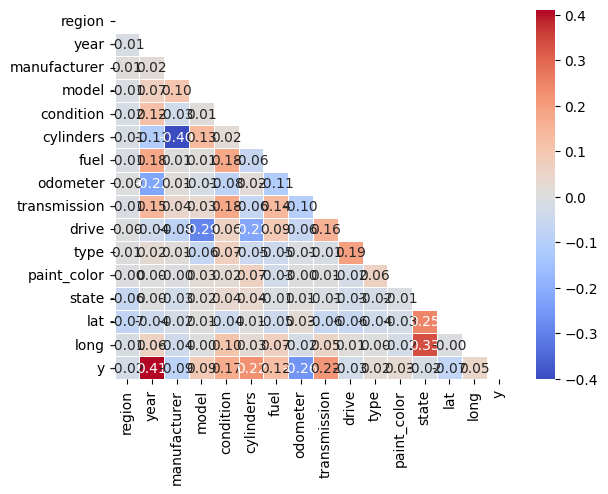

In [117]:
# Se hace una copia del train set:
X_corr = X_train.copy();

# Se añade la columna de precios:
X_corr['y'] = y_train;

# Se calcula la matrix de correlación entre todas las columnas:
corr = X_corr.corr();

# Se crea el mapa de color:
mask = np.triu(np.ones_like(corr, dtype=bool));
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

Gracias a este **mapa de color** se puede comprobar que, como se había anticipado al observar la importancia de cada una de las variables, `year` y `cylinders` son las que **más parecen influir en el precio** de venta del coche. 

Por otro lado, algo que también llama la atención es la **relación existente entre `lat` y  `long` con `state`**. Sin embargo, esta relación tiene sentido dado que la **ubicación que marcan las coordenadas** está íntimamente **relacionada con el estado de Estados Unidos donde se encuentra el usuario** que vende el coche. Por ese motivo, dado que `lat` y  `long` **no parecen estar aportando información** disinta a la predicción, se van a **eliminar**:

In [118]:
# Se eliminan las características con una colinealidad alta: 
X_train = X_train.drop(columns=['lat', 'long']);
X_test = X_test.drop(columns=['lat', 'long']);

## Paso 3 - Escalado de Variables:

El escalado de variables es un **paso imprescindible dependiendo del tipo de modelo** que se vaya a emplear para obtener la predicción necesaria. 

En este caso, debido al modelo de Machine Learning que se va a utilizar, **no va a ser necesario realizar este escalado**. Sin embargo, antes de llegar al óptimo, **se probaron distintas opciones** para las que sí era imprescindible realizar el escalado. Por este motivo, se va a dejar en este documento este tercer paso para **mostrar el procedimiento**, pese a que más adelante no se va a usar. 

Se va a optar por un **escalado estándar** de de tipo normalizació *z-score*, es decir, se transforma cada variable para qeu tenga una **media de 0** y una **desviación estándar de 1**:

In [54]:
# Se instancia un escalador normalizado:
scaler = StandardScaler();

# Se entrena el escalador y se escala el conjunto de entrenamiento:
X_train_sc = scaler.fit_transform(X_train);

# Se entrena el escalador y se escala el conjunto de test:
X_test_sc = scaler.transform(X_test);

## Paso 4 - Random Forest Regressor - GridSearchCV:


Después de probar distintos modelos, el **mejor resultado** obtenido ha sido con los **árboles de decisión** y con una **optimización de tipo GrisSearchCV**.

Los árboles de decisión son modelos de aprendizaje supervisado cuya estructura jerárquica permite **tomar decisiones sobre los datos** dividiéndolos en subconjuntos más simples. Esta **división varía dependiendo del tipo de algoritmo** de machine learning que se esté utilizado, regresión o clasificación. En este caso, se ha de predecir el precio de venta de un coche usado, por lo que se utilizará un **árbol de decisión de tipo regresión**. 

La principal ventaja de estos modelos recae en su **fácil interpretación**, a la par que la capacidad de manejar datos **sin necesidad de escalado**. Sin embargo, si no se **regulan adecuadamente mediante los hiperparámetros**, pueden caer un sobreajuste.

Para poder **definir estos hiperparámetros** de forma correcta, es necesario conocer su utilidad:

`max_depth` : Controla la profundidad máxima del árbol, es decir, el número de iteraciones que ha de realizar sobre el conjunto de datos

`criterion` : Define la métrica para evaluar la calidad de las divisiones. En este caso, al tratarse de un clasificador, las divisiones dependerán de la entropía, por lo que aquí se puede elegir qué tipo de estadística se desea para medir este parámetro.

`min_samples_split` : Número mínimo de muestras necesarias para dividir un nodo

`min_samples_leaf` : Número mínimo de muestras que debe contener un nodo hoja

`max_features`: Número máximo de características consideradas en cada división

Por otro lado, la técnica de optimización de hiperparámetros que se ha comprobado que mejor funciona para este caso es `GridSearchCV`. Esta técnica de optimización de hiperparámetros diseña una **malla con las posibles combinaciones para los posibles valores de cada hiperparámetro** (espacio de búsqueda). Posteriormente, realiza una **validación cruzada** de forma que se dividen los datos en múltiples particiones, se entrena en ellas y se valida con el resto para poder promediar los resultados obtenidos.

Además, para evaluar el desempeño del modelo, se van a utilizar métricas como el **R2**, **MAE** (Error Absoluto Medio) y **MAPE** (Error Absoluto Porcentual Medio), para analizar la **capacidad explicatica** del modelo como su **precisión en las predicciones** sobre el conjunto de test.

Por este motivo, en primer lugar, se va a **declarar una función que calcule dichas métricas** y devuelva un Data Frame con la **información organizada**. Los **inputs** de esta función serán las **predicciones y los valores reales de la variable dependiente** para los conjuntos de **entrenamiento** y **test**.

In [55]:
# Se declara una función que calcula las métricas para el conjunto de train y test y devuelve un Data Frame con los resultados y diferencias entre ambos conjuntos:
def get_metrics (yhat_test, y_test, yhat_train, y_train):

    # Se calculan las métricas para el conjunto de entrenamiento:
    metrics_train = r2_score(y_train, yhat_train), mean_absolute_error(y_train, yhat_train), mean_absolute_percentage_error(y_train, yhat_train)*100;
    
    # Se calculan las métricas para el conjunto de prueba:
    metrics_test = r2_score(y_test, yhat_test), mean_absolute_error(y_test, yhat_test), mean_absolute_percentage_error(y_test, yhat_test)*100;
    
    # Se calcula la diferencia entre las métricas de entrenamiento y prueba:
    metrics_diff = list(map(lambda x: x[1]-x[0], zip(metrics_train, metrics_test)));
    
    # Se devuelve un DataFrame con las métricas de entrenamiento, prueba y sus diferencias:
    return pd.DataFrame(data=[metrics_train, metrics_test, metrics_diff], columns=['R2', 'MAE', 'MAPE'], index=['Train set', 'Test set', 'Diferencia']);

Ahora que ya se tiene la función definida, se va a **definir el espacio de búsqueda** para poder emplear la técnica de optimización `GridSearchCV`. 

Los **valores** de entre los cuales se va a diseñar la malla son los que se ha **comprobado que mejor funcionan a la hora de realizar la predicción**, es decir, se probaron otros pero se ha decidido continuar con los que se muestran al ser los que obtenían *mejores métricas*. 

In [ ]:
# Se define el modelo de forma general: 
random_forest = RandomForestRegressor(random_state = 42);

# Se define el espacio de búsqueda de hiperparámetros: 
grid_parameters = {
    'n_estimators': [25, 30, 100, 200],
    'max_depth': [10, 12, 14, 16],
    'min_samples_leaf': [2, 4, 6, 8],
    'max_features': [int(X_train.shape[1] * p) for p in [0.5, 0.7, 0.8, 1.0]]
};

Una vez se tiene definido el espacio de búsqueda, se puede proceder a **ejecutar el modelo**, junto con la **técnica de optimización de hiperparámetros** para obtener las **predicciones** e **invocar a la función** para tener las **métricas**:

In [ ]:
# Se configura la búsqueda en malla con la validación cruzada:
grid_search = GridSearchCV(estimator = random_forest, param_grid = grid_parameters, cv = 5, n_jobs = -1, verbose = 1);

# Se ajusta el modelo con los datos de entrenamiento
grid_search.fit(X_train, y_train);

# Se muestran los mejores hiperparámetros encontrados los mejores hiperparámetros encontrados
print(f"Mejores hiperparámetros: {grid_search.best_params_}");

# Se evalúa el mejor modelo:
best_random_forest = grid_search.best_estimator_;

# Se obtiene la predicción para el conjunto de train:
y_hat_train_forest = best_random_forest.predict(X_train);

# Se obtiene la predicción para el conjunto de test:
y_hat_test_forest = best_random_forest.predict(X_test);

# Se obtienen las métricas:
df_metrics = get_metrics(y_hat_test_forest, y_test, y_hat_train_forest, y_train);



Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Mejores hiperparámetros: {'max_depth': 16, 'max_features': 10, 'min_samples_leaf': 2, 'n_estimators': 200}


,R2,MAE,MAPE
Train set,0.878302,0.167239,1.966922
Test set,0.786521,0.215271,2.545984
Diferencia,-0.091781,0.048032,0.579063


**Se guarda el conjunto de datos** con las métricas para poder consultarlo cuando sea necesario: 

In [ ]:
# Se guarda el DataFrame con las métricas:
df_metrics.to_csv("C:/Users/clara/Documents/BOOTCAMP/FinalProject/dataFrames/df_metrics.csv", index = False);

In [57]:
# Se carga el archivo CSV del DataFrame en un DataFrame
df_metrics_loaded = pd.read_csv("C:/Users/clara/Documents/BOOTCAMP/FinalProject/dataFrames/df_metrics.csv");

# Se hace una copia del DataFrame cargado para poder trabajar sobre él sin modificar el otro:
df_metrics = df_metrics_loaded.copy();

Ahora, para poder evaluar las métricas y sacar conclusiones a partir de ellas, es importante recordar que la **variable objetivo `price` pasó por una transformación logarítimica** para poder trabajar con una distribución más uniforme de los datos. 

Por este motivo, ahora es momento de **deshacer dicha conversión sobre el MAE y MAPE** (R2 no se ve afectado por esta transformación). De esta forma, se van a modificar las columnas correspondientes a esas dos métricas del conjunto de datos, **aplicando la transformación inversa a la logarítimica, la exponencial**. 

In [ ]:
# Se deshace la transformación logarítmica para el MAE:
df_metrics["MAE"] = np.exp(df_metrics["MAE"]) - 1;

# Se deshace la transformación logarítimica para el MAPE:
df_metrics["MAPE"] = (np.exp(df_metrics["MAPE"] / 100) - 1) * 100;

Finalmente, se muestran las **métricas obtenidas**:

In [ ]:
# Se muestran las métricas obtenidas:
df_metrics


,R2,MAE,MAPE
Train set,0.878302,0.182037,1.986393
Test set,0.786521,0.240198,2.578671
Diferencia,-0.091781,0.049204,0.580743


Las métricas obtenidas muestran un **buen rendimiento** pero ocon una ligera **caída en la capacidad de generalización**. 

Por un lado, el **R2** indica que el modelo utilizado **explica en un 87.83 % la variabilidad en los precios** de coches del conjunto de entrenamiento. Un **9% mejor que en el de prueba**, lo que sugiere un **leve sobreajuste**, pero deja ver que las **características utilizadas para realizar la predicción son adecuadas**.

El **Error Absoluto Medio** (MAE) refleja un **error medio relativamente pequeño** para los órdenes de magnitud que se manejan en los precios de coches, pudiendo tener una **variación de hasta 2.400€** (tal y como se refleja en el conjunto de test).

Finalmente, si se evalúa el **Error Absoluto Medio Procentual**, en el **entrenamiento se comete un error de cerca del 1.99%** mientras que en el de **prueba de alrededor de 2.58%.** Esto significa que si un coche costara 10.000€, la predicción en el test se desviaría, en promedio, 258€.

Todas las métricas muestran que el **modelo tiene bastante precisión pese a presentar un sobreajuste** que se podría llegar a solucionar, por ejemplo, minimizando el número de estimadores empleados. 

Este va a ser el **modelo final** por lo que, para poder utilizarlo en otros contextos, como en la interfaz gráfica (a programar para ejecutar con streamlit), se va a **guardar en un archivo de tipo `.pkl`** y almacenar en un Hub de Hugging Face.

In [ ]:
# Se guarda el modelo en un archivo .pkl para poder utilizarlo en otros entornos:
with open(r"C:\Users\clara\Documents\BOOTCAMP\FinalProject\models\random_forest_grid_model.pkl", "wb") as f:
    pickle.dump(best_random_forest, f)

Lo mismo ocurre con el **diccionario de codificadores** utilizado durante el Análisis Exploratorio de Datos:

In [ ]:
# Se guarda el diccionario de codificadores en un archivo .pkl para poder utilizarlo en otros entornos:
with open(r"C:\Users\clara\Documents\BOOTCAMP\FinalProject\models\encoders.pkl", "wb") as file:
    pickle.dump(encoders, file);